# Oil & Gas Production EDA Dashboard
**Target Variable:** `BORE_OIL_VOL` (Oil Production Volume)

**Wells:** 7 wells from the Volve field (Norwegian Continental Shelf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('vpd.csv')
df['DATEPRD'] = pd.to_datetime(df['DATEPRD'], dayfirst=True)
df = df.sort_values(['NPD_WELL_BORE_NAME', 'DATEPRD']).reset_index(drop=True)
print(f'Dataset shape: {df.shape}')
print(f'Date range: {df["DATEPRD"].min()} to {df["DATEPRD"].max()}')
df.head()

Dataset shape: (15634, 19)
Date range: 2007-09-01 00:00:00 to 2016-12-01 00:00:00


DATEPRD  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  ON_STREAM_HRS  \
0 2014-04-07                7405         15/9-F-1 C            0.0   
1 2014-04-08                7405         15/9-F-1 C            0.0   
2 2014-04-09                7405         15/9-F-1 C            0.0   
3 2014-04-10                7405         15/9-F-1 C            0.0   
4 2014-04-11                7405         15/9-F-1 C            0.0   

   AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
0                  0.000                     0.000          0.000   
1                    NaN                       NaN            NaN   
2                    NaN                       NaN            NaN   
3                    NaN                       NaN            NaN   
4                310.376                    96.876        277.278   

   AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  AVG_WHP_P  AVG_WHT_P  \
0                0.0           0.00000             %      0.000       0.00   
1                0.0           1.00306             %      0.000       0.00   
2                0.0           0.97901             %      0.000       0.00   
3                0.0           0.54576             %      0.000       0.00   
4                0.0           1.21599             %     33.098      10.48   

   DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  \
0          0.000           0.0           0.0           0.0          NaN   
1          0.000           0.0           0.0           0.0          NaN   
2          0.000           0.0           0.0           0.0          NaN   
3          0.000           0.0           0.0           0.0          NaN   
4         33.072           0.0           0.0           0.0          NaN   

    FLOW_KIND WELL_TYPE  
0  production        WI  
1  production        OP  
2  production        OP  
3  production        OP  
4  production        OP

---
## 1. Dataset Overview

In [3]:
print('='*60)
print('DATASET INFO')
print('='*60)
print(f'Total rows: {df.shape[0]}')
print(f'Total columns: {df.shape[1]}')
print(f'\nColumn dtypes:')
print(df.dtypes)
print(f'\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')

DATASET INFO
Total rows: 15634
Total columns: 19

Column dtypes:
DATEPRD                     datetime64[us]
NPD_WELL_BORE_CODE                   int64
NPD_WELL_BORE_NAME                     str
ON_STREAM_HRS                      float64
AVG_DOWNHOLE_PRESSURE              float64
AVG_DOWNHOLE_TEMPERATURE           float64
AVG_DP_TUBING                      float64
AVG_ANNULUS_PRESS                  float64
AVG_CHOKE_SIZE_P                   float64
AVG_CHOKE_UOM                          str
AVG_WHP_P                          float64
AVG_WHT_P                          float64
DP_CHOKE_SIZE                      float64
BORE_OIL_VOL                       float64
BORE_GAS_VOL                       float64
BORE_WAT_VOL                       float64
BORE_WI_VOL                        float64
FLOW_KIND                              str
WELL_TYPE                              str
dtype: object

Memory usage: 4.92 MB


In [4]:
print('='*60)
print('STATISTICAL SUMMARY')
print('='*60)
df.describe().round(2)

STATISTICAL SUMMARY


DATEPRD  NPD_WELL_BORE_CODE  ON_STREAM_HRS  \
count                       15634            15634.00       15349.00   
mean   2012-11-07 17:39:58.004349             5908.58          19.99   
min           2007-09-01 00:00:00             5351.00           0.00   
25%           2010-07-30 00:00:00             5599.00          24.00   
50%           2013-05-08 00:00:00             5693.00          24.00   
75%           2015-02-19 00:00:00             5769.00          24.00   
max           2016-12-01 00:00:00             7405.00          25.00   
std                           NaN              649.23           8.37   

       AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  \
count                8980.00                   8980.00        8980.00   
mean                  181.80                     77.16         154.03   
min                     0.00                      0.00           0.00   
25%                     0.00                      0.00          83.66   
50%                   232.90                    103.19         175.59   
75%                   255.40                    106.28         204.32   
max                   397.59                    108.50         345.91   
std                   109.71                     45.66          76.75   

       AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  \
count            7890.00           8919.00    9155.00    9146.00   
mean               14.86             55.17      45.38      67.73   
min                 0.00              0.00       0.00       0.00   
25%                10.84             18.95      31.15      56.58   
50%                16.31             52.10      37.93      80.07   
75%                21.31             99.92      57.10      88.06   
max                30.02            100.00     137.31      93.51   
std                 8.41             36.69      24.75      27.72   

       DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
count       15340.00       9161.00       9161.00       9161.00      5706.00  
mean           11.44       1095.64     161049.06       1672.15      5315.48  
min             0.00          0.00          0.00       -458.00         0.00  
25%             0.00        191.00      29431.00         20.00      4338.25  
50%             2.38        558.00      87750.00       1098.00      5504.50  
75%            13.77       1345.00     202482.00       3261.00      6780.75  
max           125.72       5902.00     851132.00       8020.00     10014.00  
std            19.82       1323.54     188136.41       1706.98      2181.49

---
## 2. Well Segregation - Records per Well

Number of wells: 7

Well names: ['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D', '15/9-F-4', '15/9-F-5']

Records per well:
NPD_WELL_BORE_NAME
15/9-F-4       3327
15/9-F-5       3306
15/9-F-12      3056
15/9-F-14      3056
15/9-F-11      1165
15/9-F-15 D     978
15/9-F-1 C      746
Name: count, dtype: int64


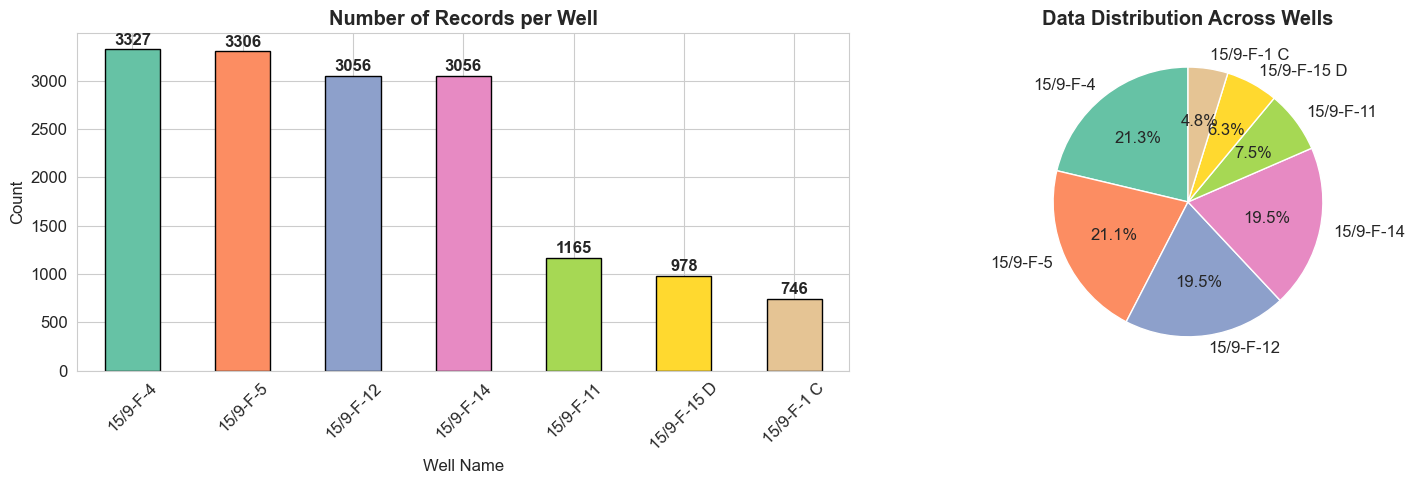

In [5]:
wells = df['NPD_WELL_BORE_NAME'].unique()
well_counts = df['NPD_WELL_BORE_NAME'].value_counts()

print(f'Number of wells: {len(wells)}')
print(f'\nWell names: {list(wells)}')
print(f'\nRecords per well:')
print(well_counts)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Bar plot
colors = sns.color_palette('Set2', len(wells))
well_counts.plot(kind='bar', ax=axes[0], color=colors, edgecolor='black')
axes[0].set_title('Number of Records per Well', fontweight='bold')
axes[0].set_xlabel('Well Name')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(well_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(well_counts.values, labels=well_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[1].set_title('Data Distribution Across Wells', fontweight='bold')

plt.tight_layout()
plt.show()

Well Type distribution:
WELL_TYPE
OP    9143
WI    6491
Name: count, dtype: int64

Flow Kind distribution:
FLOW_KIND
production    9161
injection     6473
Name: count, dtype: int64


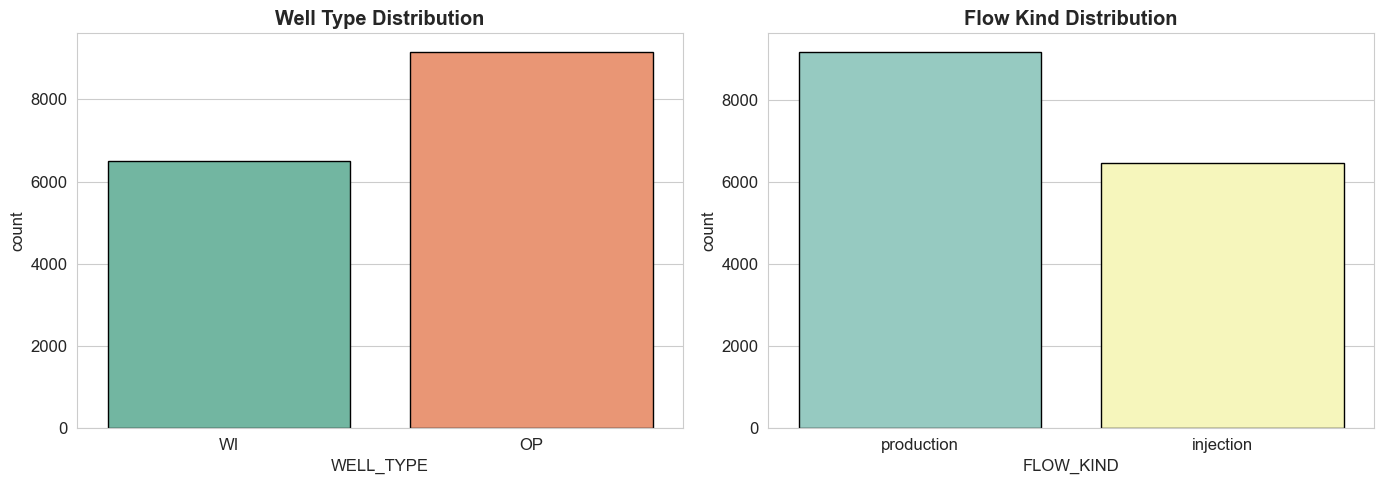

In [6]:
# Well type and flow kind breakdown
print('Well Type distribution:')
print(df['WELL_TYPE'].value_counts())
print(f'\nFlow Kind distribution:')
print(df['FLOW_KIND'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=df, x='WELL_TYPE', ax=axes[0], palette='Set2', edgecolor='black')
axes[0].set_title('Well Type Distribution', fontweight='bold')
sns.countplot(data=df, x='FLOW_KIND', ax=axes[1], palette='Set3', edgecolor='black')
axes[1].set_title('Flow Kind Distribution', fontweight='bold')
plt.tight_layout()
plt.show()

---
## 3. Missing Values Analysis

In [7]:
# Overall missing values
null_counts = df.isnull().sum()
null_pct = (df.isnull().sum() / len(df) * 100).round(2)
null_df = pd.DataFrame({'Null Count': null_counts, 'Null %': null_pct})
null_df = null_df.sort_values('Null %', ascending=False)

print('='*60)
print('MISSING VALUES SUMMARY')
print('='*60)
print(null_df)
print(f'\nTotal missing values: {df.isnull().sum().sum()}')
print(f'Total cells: {df.shape[0] * df.shape[1]}')
print(f'Overall missing %: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%')

MISSING VALUES SUMMARY
                          Null Count  Null %
BORE_WI_VOL                     9928   63.50
AVG_ANNULUS_PRESS               7744   49.53
AVG_CHOKE_SIZE_P                6715   42.95
AVG_DOWNHOLE_PRESSURE           6654   42.56
AVG_DOWNHOLE_TEMPERATURE        6654   42.56
AVG_DP_TUBING                   6654   42.56
AVG_WHT_P                       6488   41.50
AVG_WHP_P                       6479   41.44
AVG_CHOKE_UOM                   6473   41.40
BORE_WAT_VOL                    6473   41.40
BORE_OIL_VOL                    6473   41.40
BORE_GAS_VOL                    6473   41.40
DP_CHOKE_SIZE                    294    1.88
ON_STREAM_HRS                    285    1.82
FLOW_KIND                          0    0.00
DATEPRD                            0    0.00
NPD_WELL_BORE_CODE                 0    0.00
NPD_WELL_BORE_NAME                 0    0.00
WELL_TYPE                          0    0.00

Total missing values: 83787
Total cells: 297046
Overall missing %: 28.21%


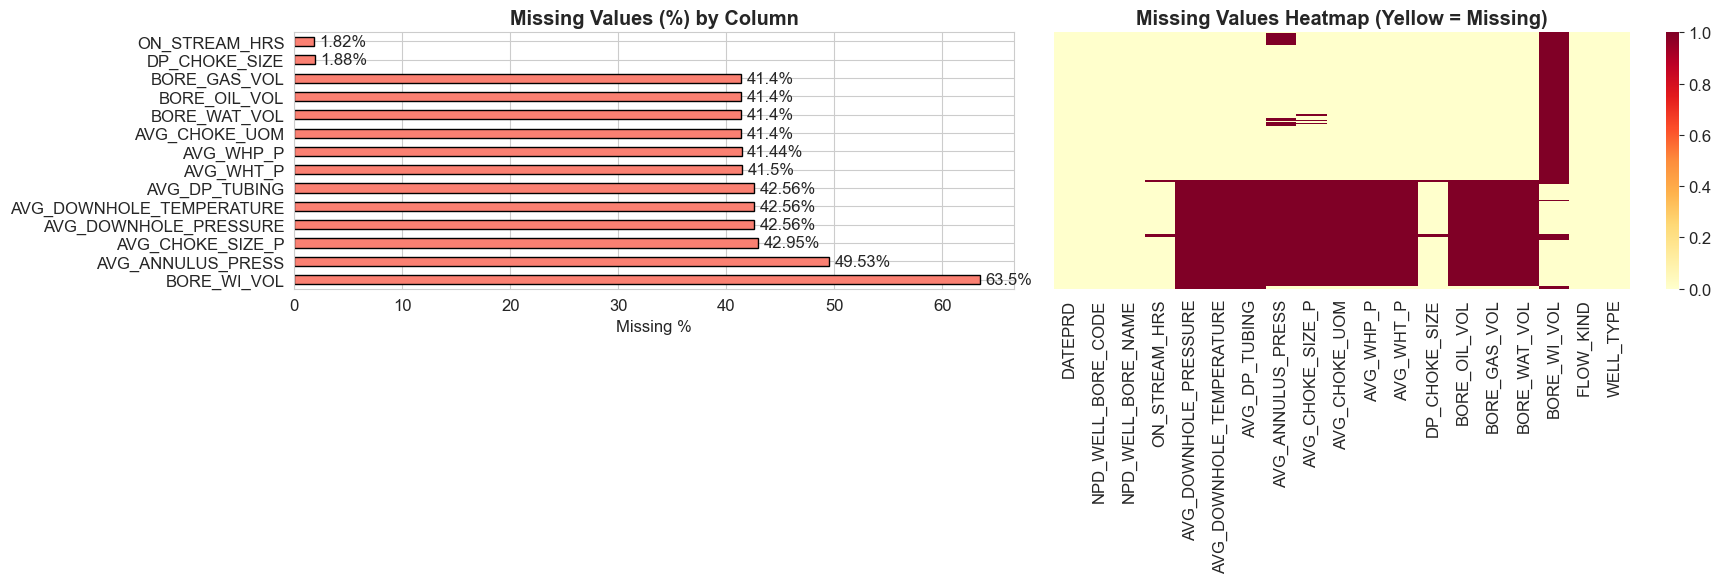

In [8]:
# Missing values bar chart
cols_with_nulls = null_df[null_df['Null Count'] > 0]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

cols_with_nulls['Null %'].plot(kind='barh', ax=axes[0], color='salmon', edgecolor='black')
axes[0].set_title('Missing Values (%) by Column', fontweight='bold')
axes[0].set_xlabel('Missing %')
for i, v in enumerate(cols_with_nulls['Null %'].values):
    axes[0].text(v + 0.5, i, f'{v}%', va='center')

# Missing values heatmap
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, ax=axes[1], cmap='YlOrRd')
axes[1].set_title('Missing Values Heatmap (Yellow = Missing)', fontweight='bold')

plt.tight_layout()
plt.show()

In [9]:
# Missing values per well
print('='*60)
print('MISSING VALUES PER WELL (key columns)')
print('='*60)
key_cols = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
            'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']

for well in wells:
    well_data = df[df['NPD_WELL_BORE_NAME'] == well]
    print(f'\n--- {well} ({len(well_data)} records) ---')
    for col in key_cols:
        n_miss = well_data[col].isnull().sum()
        if n_miss > 0:
            print(f'  {col}: {n_miss} missing ({n_miss/len(well_data)*100:.1f}%)')

MISSING VALUES PER WELL (key columns)

--- 15/9-F-1 C (746 records) ---
  AVG_DOWNHOLE_PRESSURE: 3 missing (0.4%)
  AVG_DOWNHOLE_TEMPERATURE: 3 missing (0.4%)
  AVG_DP_TUBING: 3 missing (0.4%)
  AVG_ANNULUS_PRESS: 729 missing (97.7%)

--- 15/9-F-11 (1165 records) ---
  AVG_DOWNHOLE_PRESSURE: 6 missing (0.5%)
  AVG_DOWNHOLE_TEMPERATURE: 6 missing (0.5%)
  AVG_DP_TUBING: 6 missing (0.5%)
  AVG_ANNULUS_PRESS: 6 missing (0.5%)

--- 15/9-F-12 (3056 records) ---
  AVG_DOWNHOLE_PRESSURE: 6 missing (0.2%)
  AVG_DOWNHOLE_TEMPERATURE: 6 missing (0.2%)
  AVG_DP_TUBING: 6 missing (0.2%)
  AVG_ANNULUS_PRESS: 13 missing (0.4%)

--- 15/9-F-14 (3056 records) ---
  AVG_DOWNHOLE_PRESSURE: 6 missing (0.2%)
  AVG_DOWNHOLE_TEMPERATURE: 6 missing (0.2%)
  AVG_DP_TUBING: 6 missing (0.2%)
  AVG_ANNULUS_PRESS: 523 missing (17.1%)

--- 15/9-F-15 D (978 records) ---

--- 15/9-F-4 (3327 records) ---
  ON_STREAM_HRS: 152 missing (4.6%)
  AVG_DOWNHOLE_PRESSURE: 3327 missing (100.0%)
  AVG_DOWNHOLE_TEMPERATURE: 3327

---
## 4. Target Variable Analysis - BORE_OIL_VOL

TARGET VARIABLE: BORE_OIL_VOL
Count: 9161
Mean: 1095.64
Median: 558.00
Std: 1323.54
Min: 0.00
Max: 5902.00
Skewness: 1.67
Kurtosis: 2.00
Zero values: 1154 (12.6%)
Non-zero values: 8007 (87.4%)


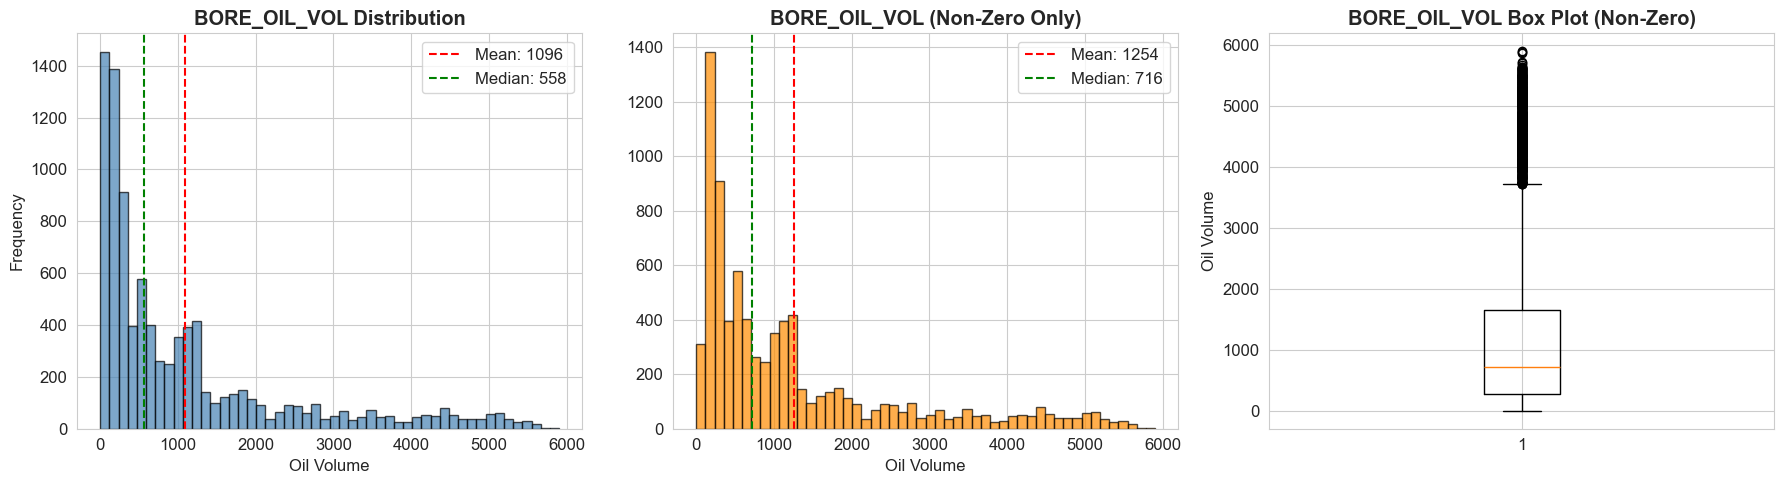

In [10]:
target = df['BORE_OIL_VOL'].dropna()

print('='*60)
print('TARGET VARIABLE: BORE_OIL_VOL')
print('='*60)
print(f'Count: {target.count()}')
print(f'Mean: {target.mean():.2f}')
print(f'Median: {target.median():.2f}')
print(f'Std: {target.std():.2f}')
print(f'Min: {target.min():.2f}')
print(f'Max: {target.max():.2f}')
print(f'Skewness: {target.skew():.2f}')
print(f'Kurtosis: {target.kurtosis():.2f}')
print(f'Zero values: {(target == 0).sum()} ({(target == 0).sum()/len(target)*100:.1f}%)')
print(f'Non-zero values: {(target > 0).sum()} ({(target > 0).sum()/len(target)*100:.1f}%)')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(target, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(target.mean(), color='red', linestyle='--', label=f'Mean: {target.mean():.0f}')
axes[0].axvline(target.median(), color='green', linestyle='--', label=f'Median: {target.median():.0f}')
axes[0].set_title('BORE_OIL_VOL Distribution', fontweight='bold')
axes[0].set_xlabel('Oil Volume')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Histogram without zeros
target_nz = target[target > 0]
axes[1].hist(target_nz, bins=50, color='darkorange', edgecolor='black', alpha=0.7)
axes[1].axvline(target_nz.mean(), color='red', linestyle='--', label=f'Mean: {target_nz.mean():.0f}')
axes[1].axvline(target_nz.median(), color='green', linestyle='--', label=f'Median: {target_nz.median():.0f}')
axes[1].set_title('BORE_OIL_VOL (Non-Zero Only)', fontweight='bold')
axes[1].set_xlabel('Oil Volume')
axes[1].legend()

# Box plot
axes[2].boxplot(target_nz, vert=True)
axes[2].set_title('BORE_OIL_VOL Box Plot (Non-Zero)', fontweight='bold')
axes[2].set_ylabel('Oil Volume')

plt.tight_layout()
plt.show()

---
## 5. Well-wise Segregation & Production Analysis

In [11]:
# Segregate wells into individual dataframes
well_dfs = {}
for well in wells:
    well_dfs[well] = df[df['NPD_WELL_BORE_NAME'] == well].reset_index(drop=True)

# Summary stats per well for BORE_OIL_VOL
print('='*80)
print('BORE_OIL_VOL STATISTICS PER WELL')
print('='*80)
well_stats = df.groupby('NPD_WELL_BORE_NAME')['BORE_OIL_VOL'].agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
).round(2)
well_stats['non_zero_count'] = df[df['BORE_OIL_VOL'] > 0].groupby('NPD_WELL_BORE_NAME')['BORE_OIL_VOL'].count()
well_stats['total_production'] = df.groupby('NPD_WELL_BORE_NAME')['BORE_OIL_VOL'].sum().round(0)
print(well_stats)

BORE_OIL_VOL STATISTICS PER WELL
                    count     mean  median      std  min     max  \
NPD_WELL_BORE_NAME                                                 
15/9-F-1 C            746   238.21   201.0   275.74  0.0  1550.0   
15/9-F-11            1165   985.29  1078.0   437.06  0.0  2065.0   
15/9-F-12            3056  1498.57   698.0  1662.85  0.0  5902.0   
15/9-F-14            3056  1290.01   881.0  1298.36  0.0  5644.0   
15/9-F-15 D           978   151.86   175.5    97.63  0.0   513.0   
15/9-F-4                0      NaN     NaN      NaN  NaN     NaN   
15/9-F-5              160   257.27   308.0   131.09  0.0   397.0   

                    non_zero_count  total_production  
NPD_WELL_BORE_NAME                                    
15/9-F-1 C                   430.0          177707.0  
15/9-F-11                   1123.0         1147860.0  
15/9-F-12                   2836.0         4579620.0  
15/9-F-14                   2723.0         3942270.0  
15/9-F-15 D             

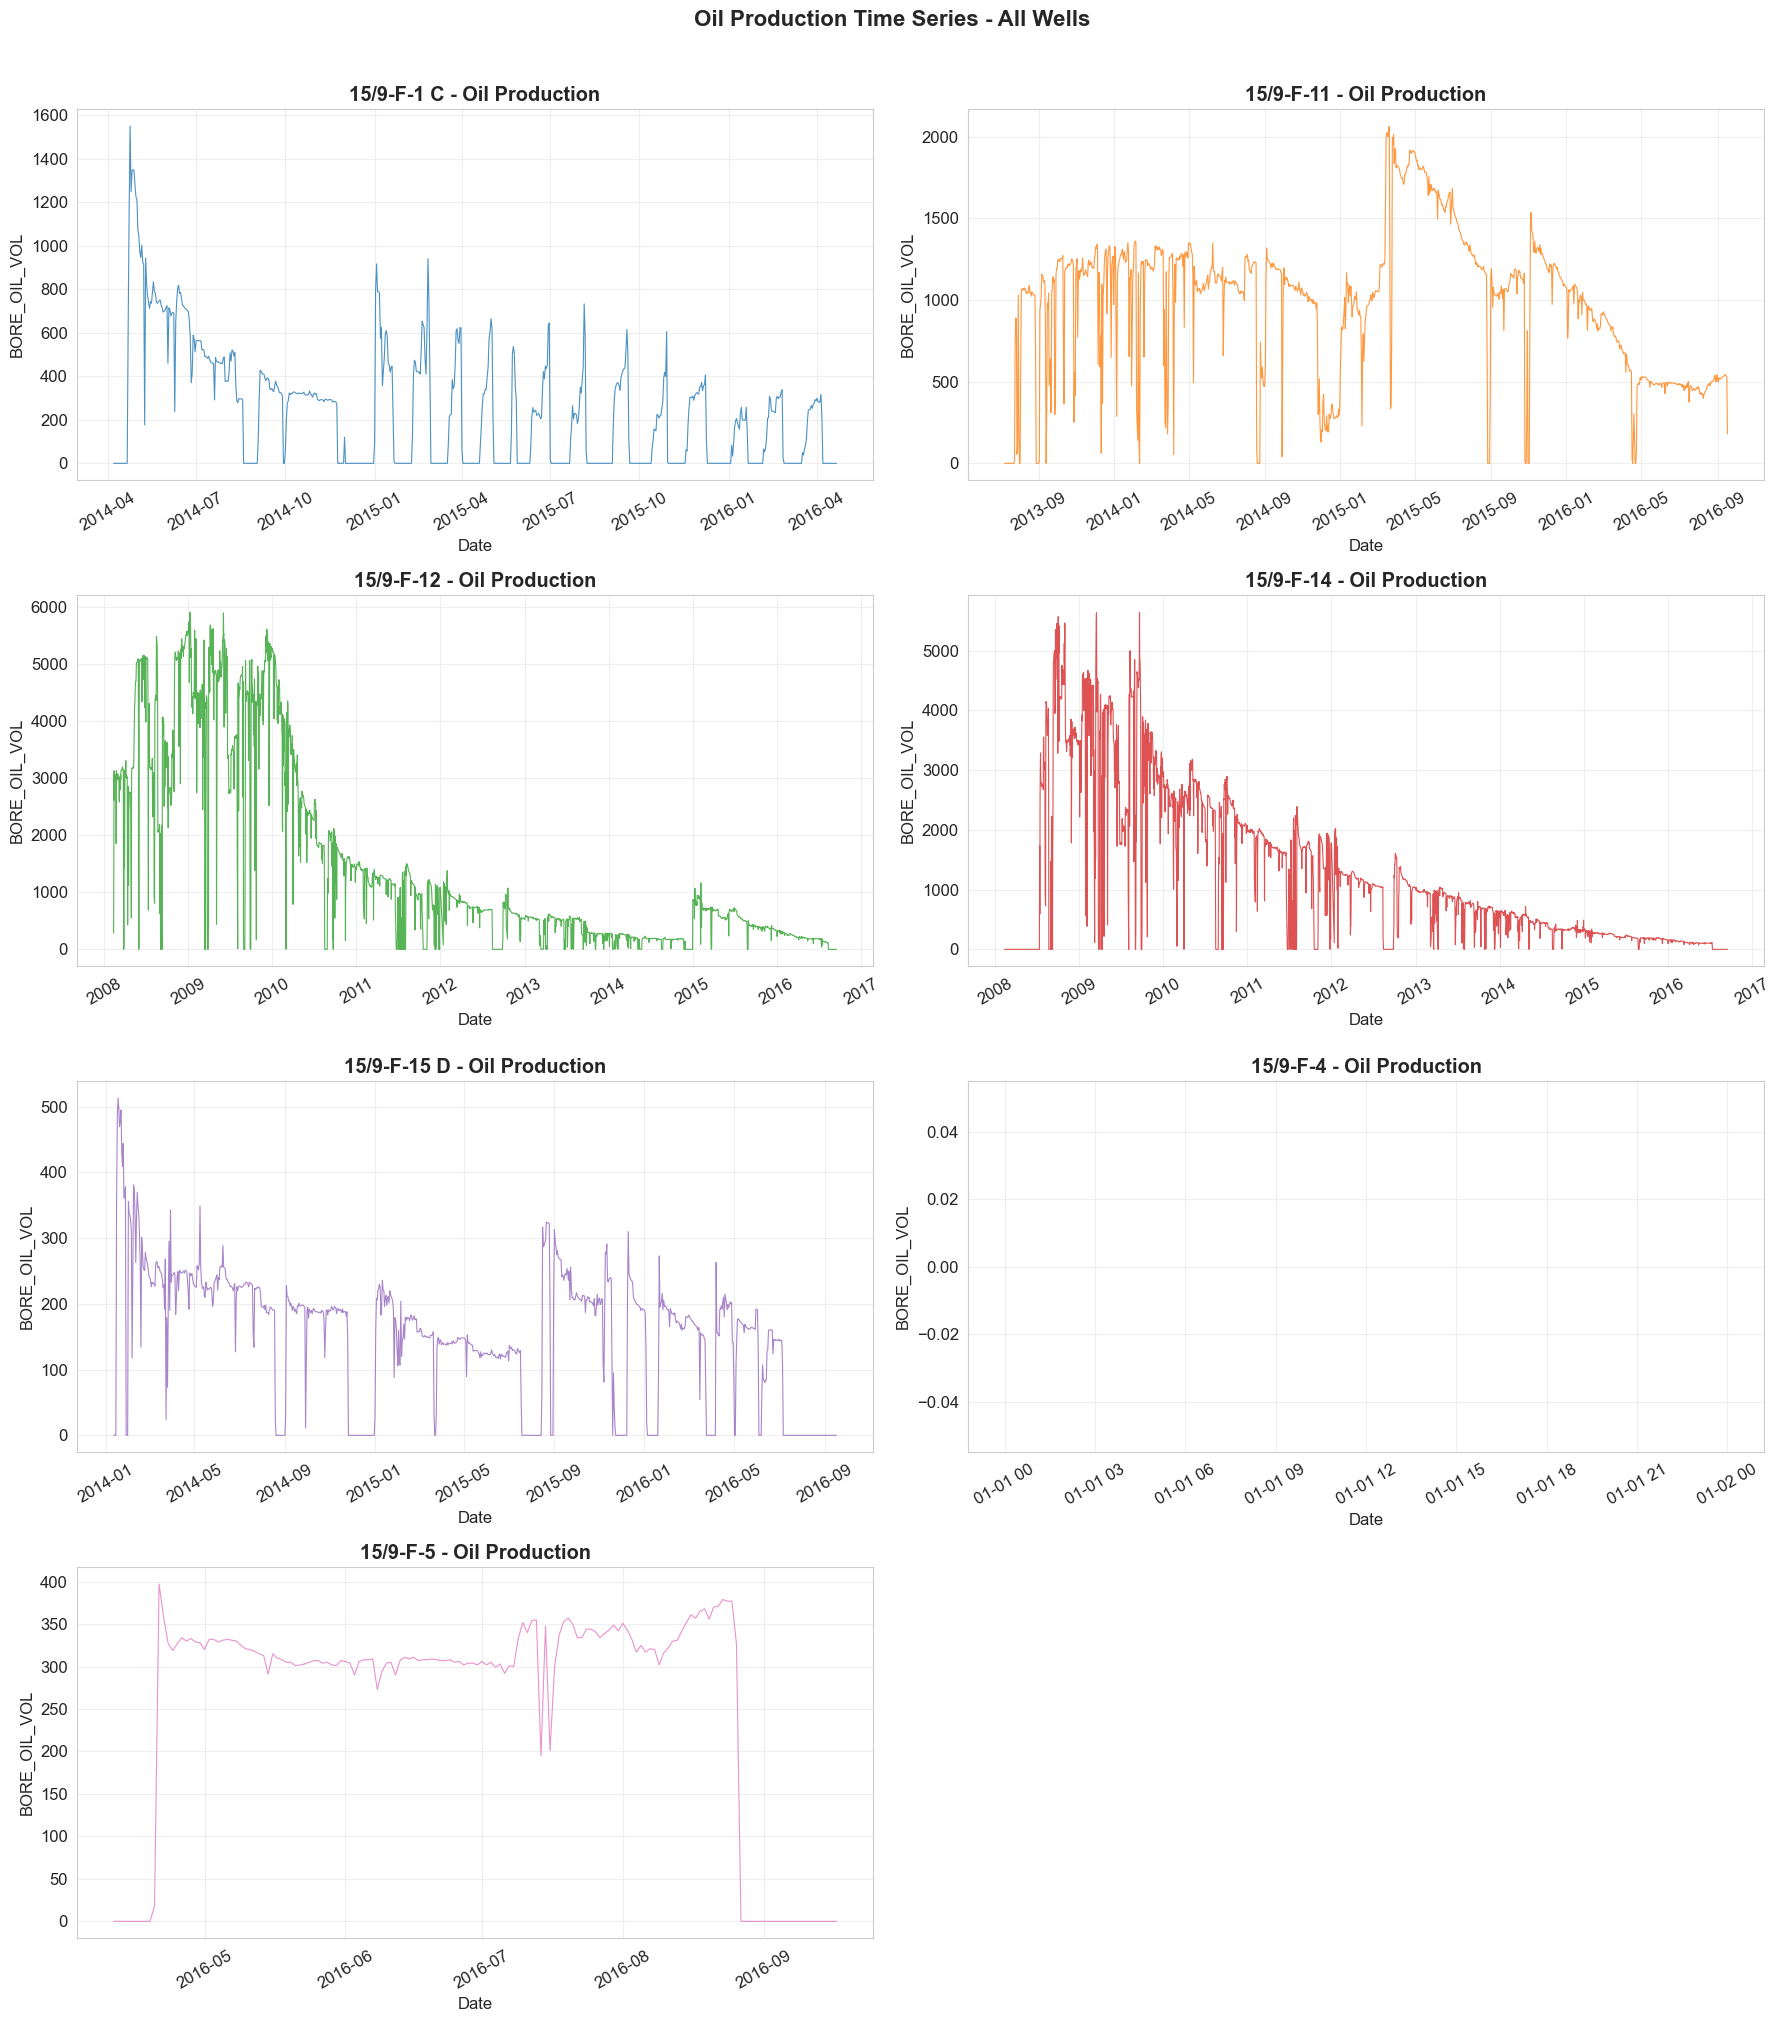

In [12]:
# Oil production time series for each well
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

colors = sns.color_palette('tab10', len(wells))

for i, well in enumerate(wells):
    wdf = well_dfs[well]
    axes[i].plot(wdf['DATEPRD'], wdf['BORE_OIL_VOL'], color=colors[i], alpha=0.8, linewidth=0.8)
    axes[i].set_title(f'{well} - Oil Production', fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('BORE_OIL_VOL')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=30)

# Hide last empty subplot
axes[-1].set_visible(False)
plt.suptitle('Oil Production Time Series - All Wells', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

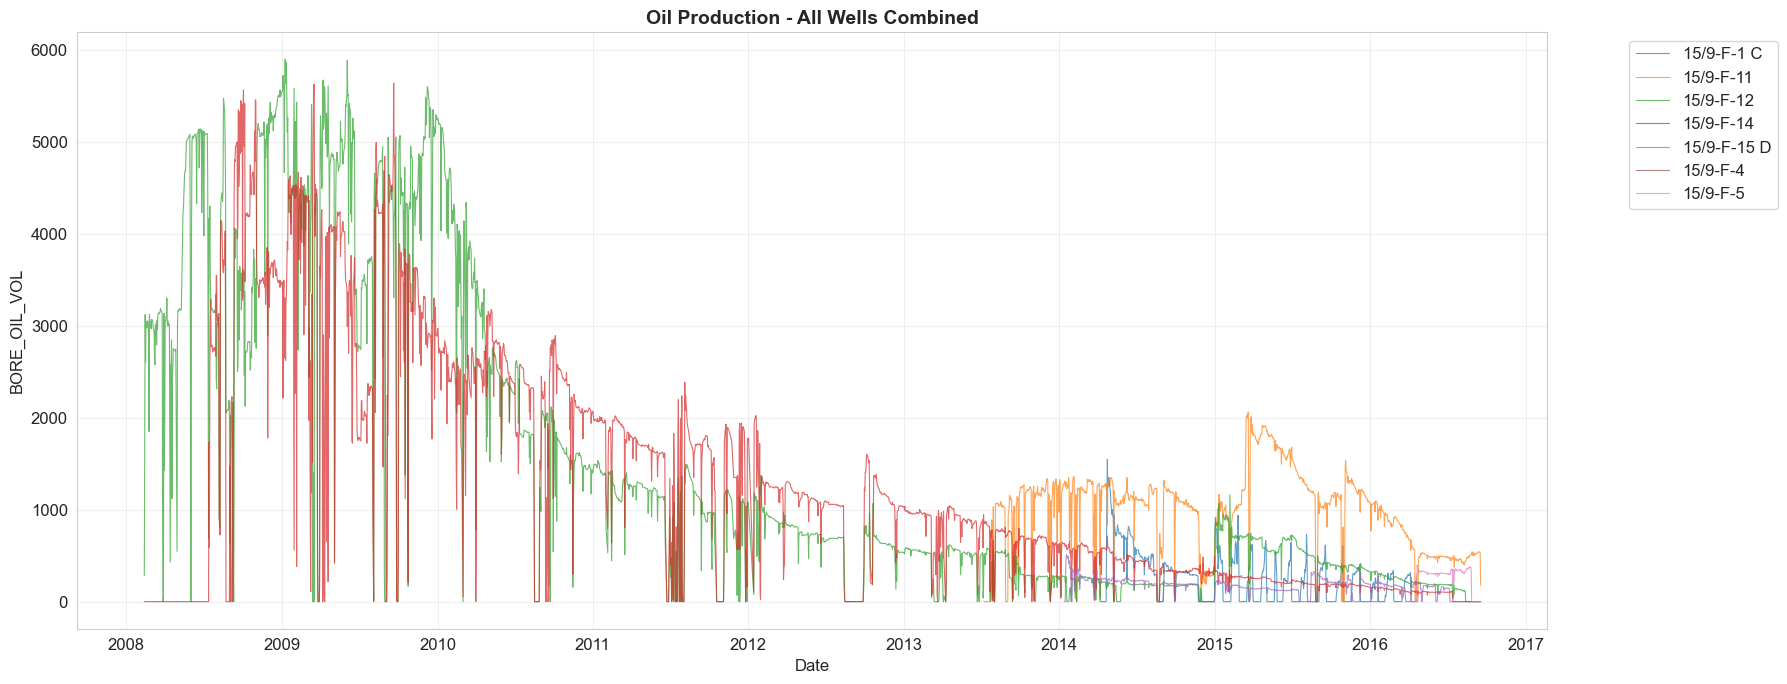

In [13]:
# All wells on one plot
fig, ax = plt.subplots(figsize=(18, 7))
for i, well in enumerate(wells):
    wdf = well_dfs[well]
    ax.plot(wdf['DATEPRD'], wdf['BORE_OIL_VOL'], label=well, alpha=0.7, linewidth=0.8)

ax.set_title('Oil Production - All Wells Combined', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('BORE_OIL_VOL')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

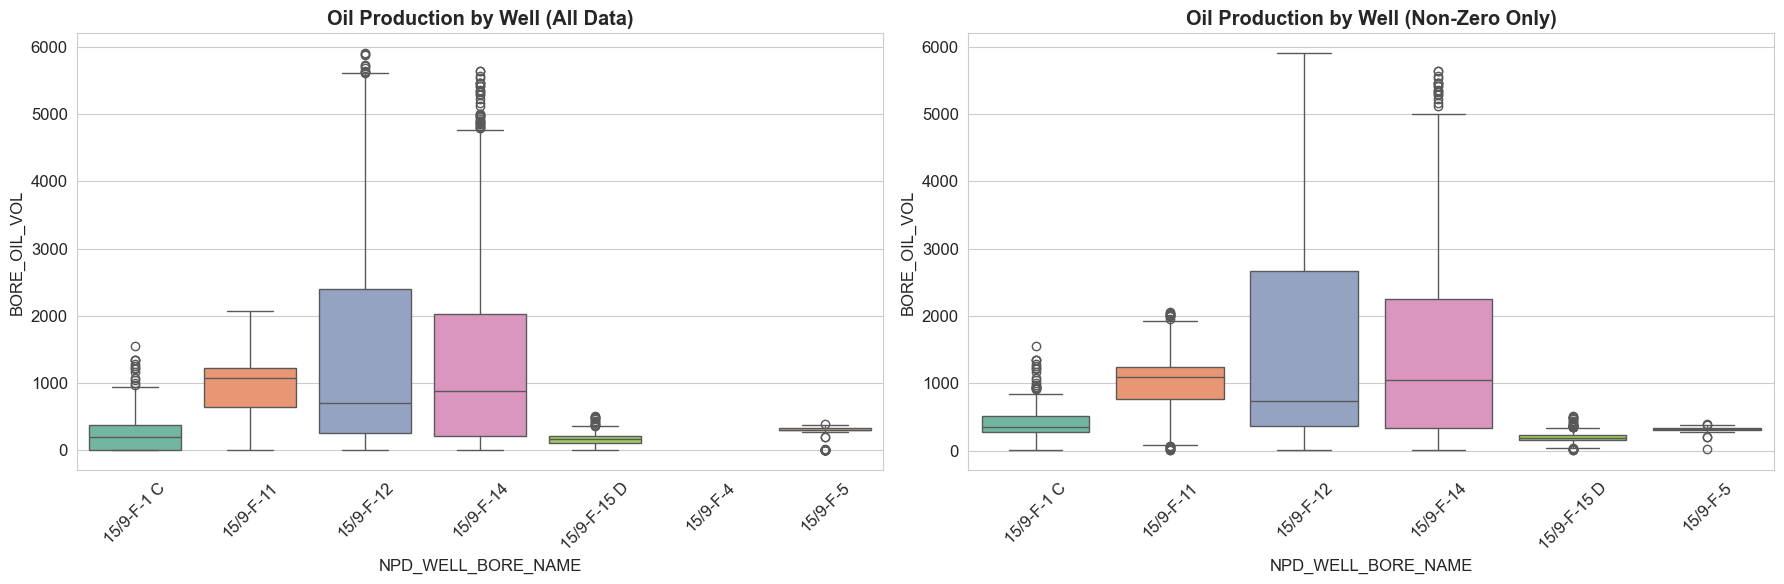

In [14]:
# Box plot of oil production per well
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# All data
sns.boxplot(data=df, x='NPD_WELL_BORE_NAME', y='BORE_OIL_VOL', ax=axes[0], palette='Set2')
axes[0].set_title('Oil Production by Well (All Data)', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Non-zero only
df_nz = df[df['BORE_OIL_VOL'] > 0]
sns.boxplot(data=df_nz, x='NPD_WELL_BORE_NAME', y='BORE_OIL_VOL', ax=axes[1], palette='Set2')
axes[1].set_title('Oil Production by Well (Non-Zero Only)', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---
## 6. Production Trio: Oil, Gas, Water per Well

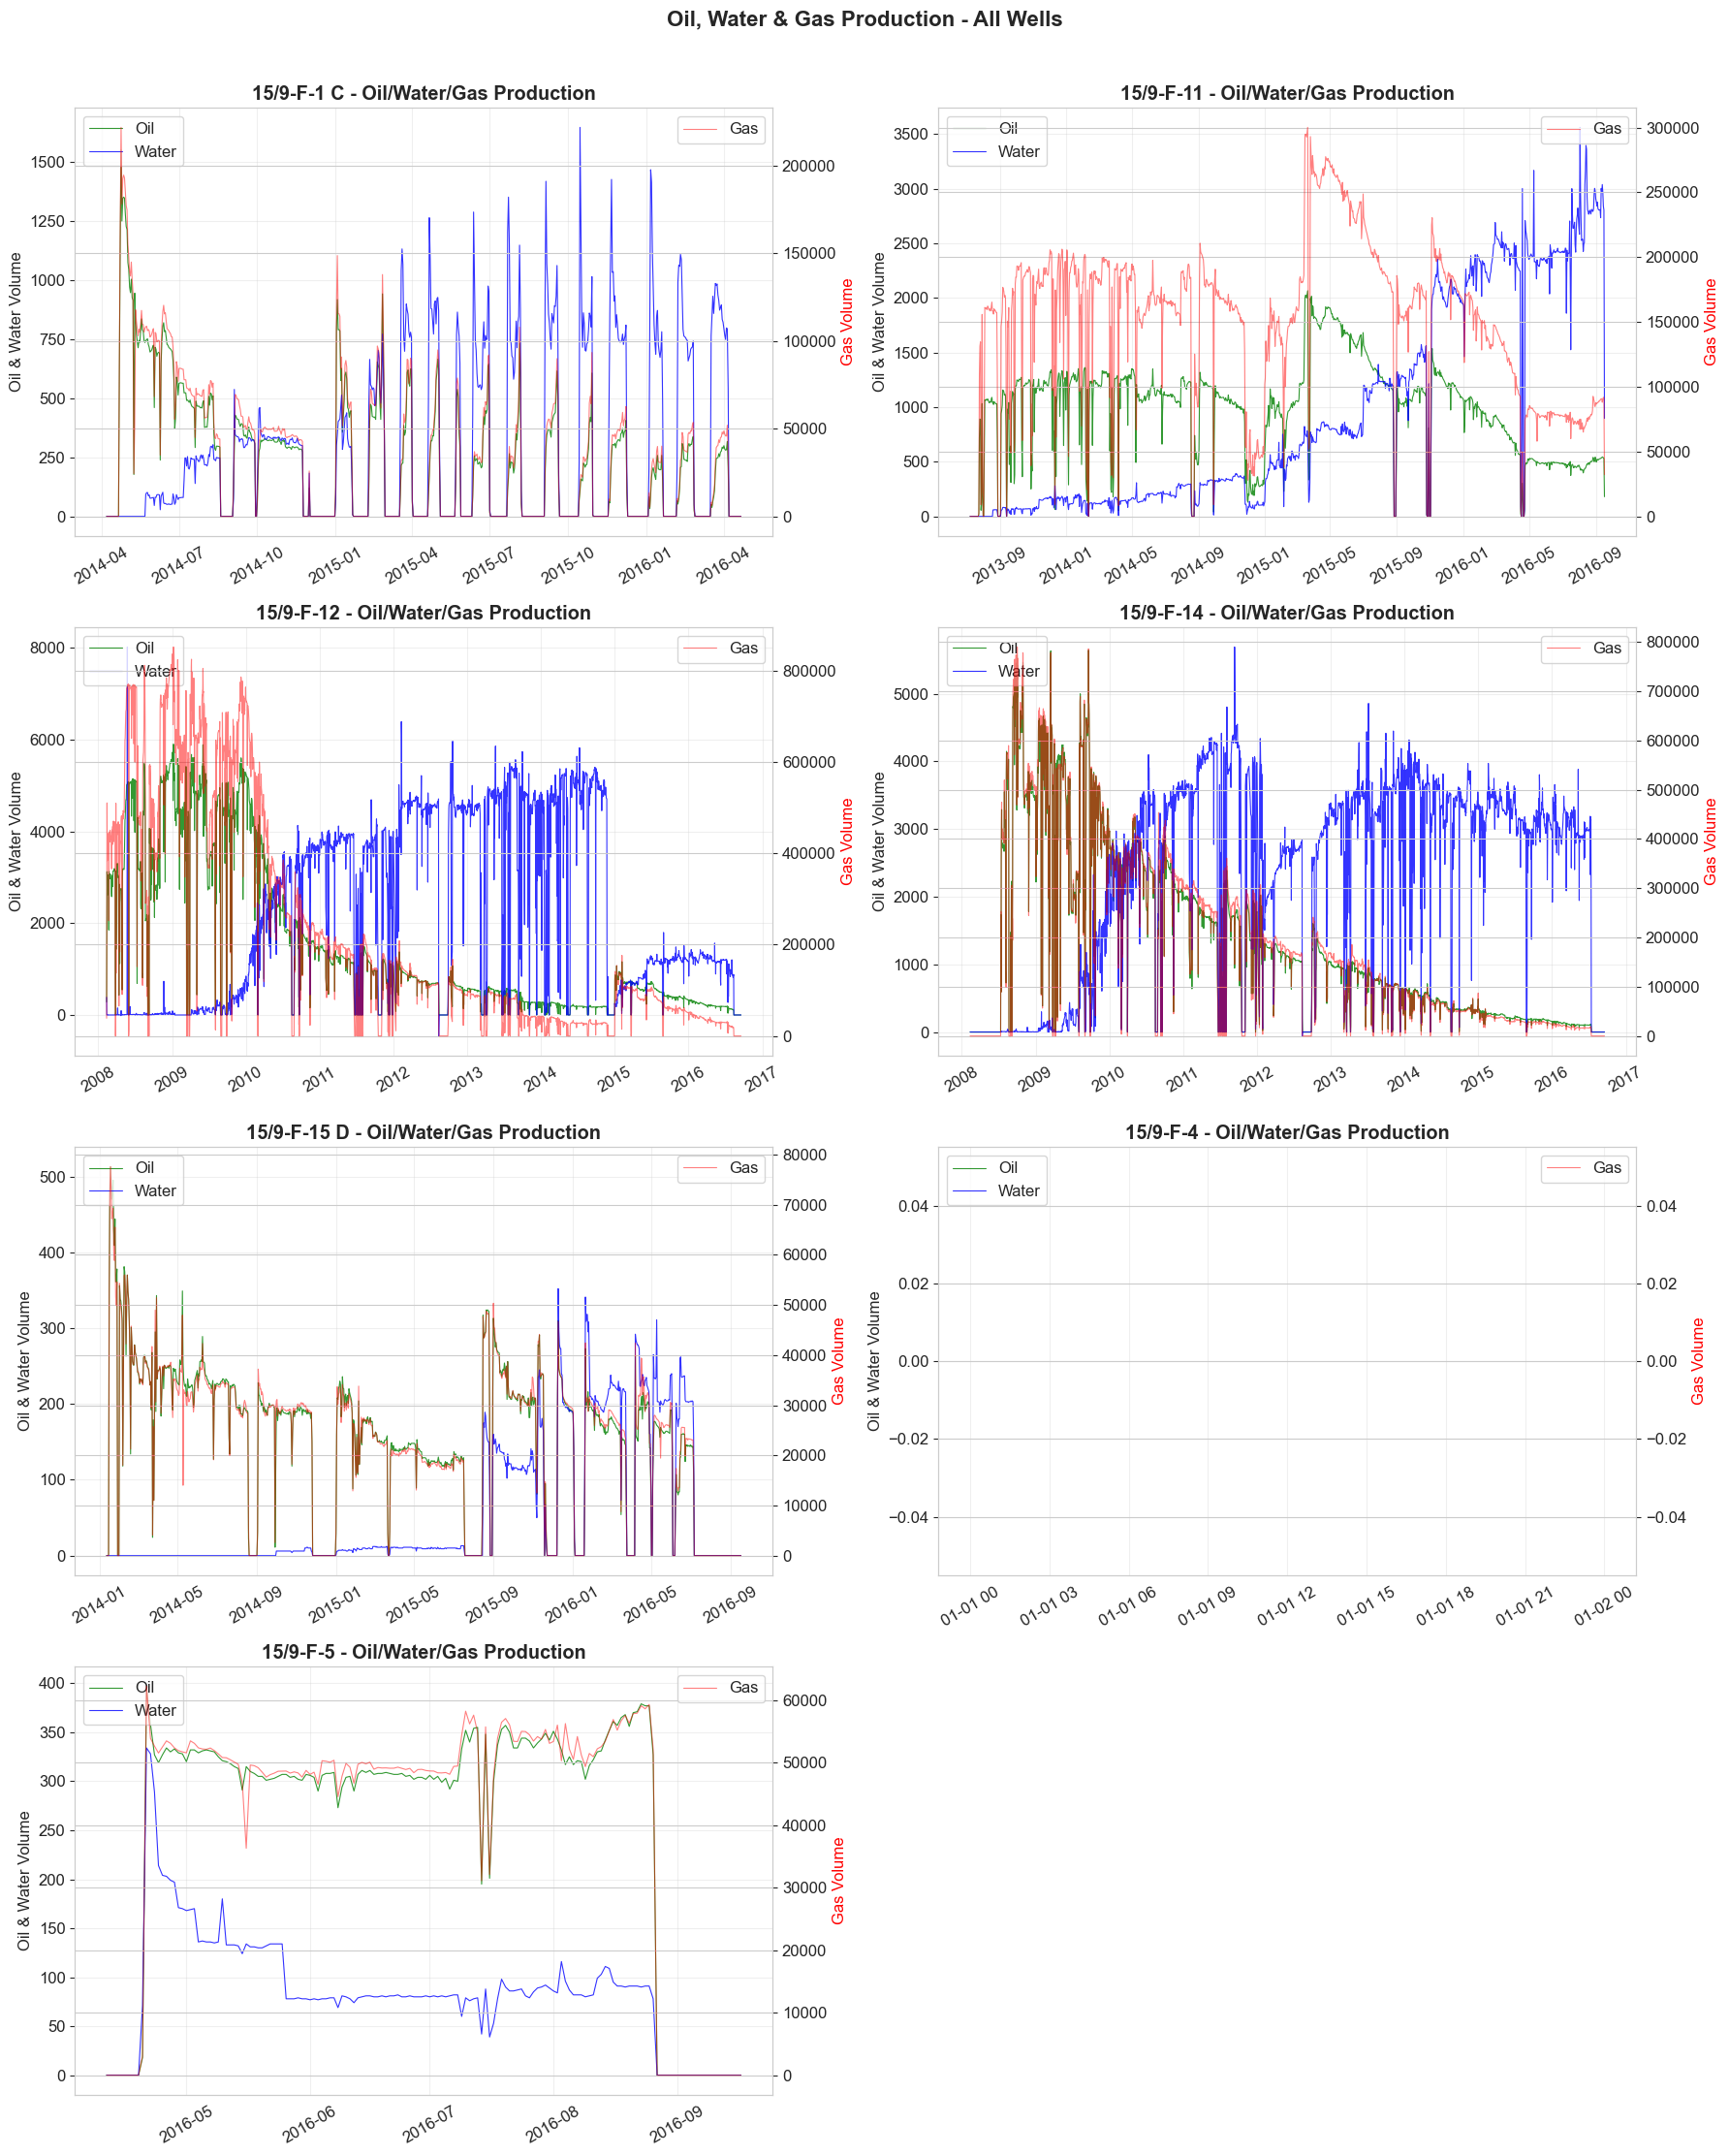

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(18, 22))
axes = axes.flatten()

for i, well in enumerate(wells):
    wdf = well_dfs[well]
    axes[i].plot(wdf['DATEPRD'], wdf['BORE_OIL_VOL'], label='Oil', color='green', alpha=0.8, linewidth=0.8)
    axes[i].plot(wdf['DATEPRD'], wdf['BORE_WAT_VOL'], label='Water', color='blue', alpha=0.8, linewidth=0.8)
    ax2 = axes[i].twinx()
    ax2.plot(wdf['DATEPRD'], wdf['BORE_GAS_VOL'], label='Gas', color='red', alpha=0.5, linewidth=0.8)
    ax2.set_ylabel('Gas Volume', color='red')
    axes[i].set_title(f'{well} - Oil/Water/Gas Production', fontweight='bold')
    axes[i].set_ylabel('Oil & Water Volume')
    axes[i].legend(loc='upper left')
    ax2.legend(loc='upper right')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=30)

axes[-1].set_visible(False)
plt.suptitle('Oil, Water & Gas Production - All Wells', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

---
## 7. Feature Distributions - Histograms

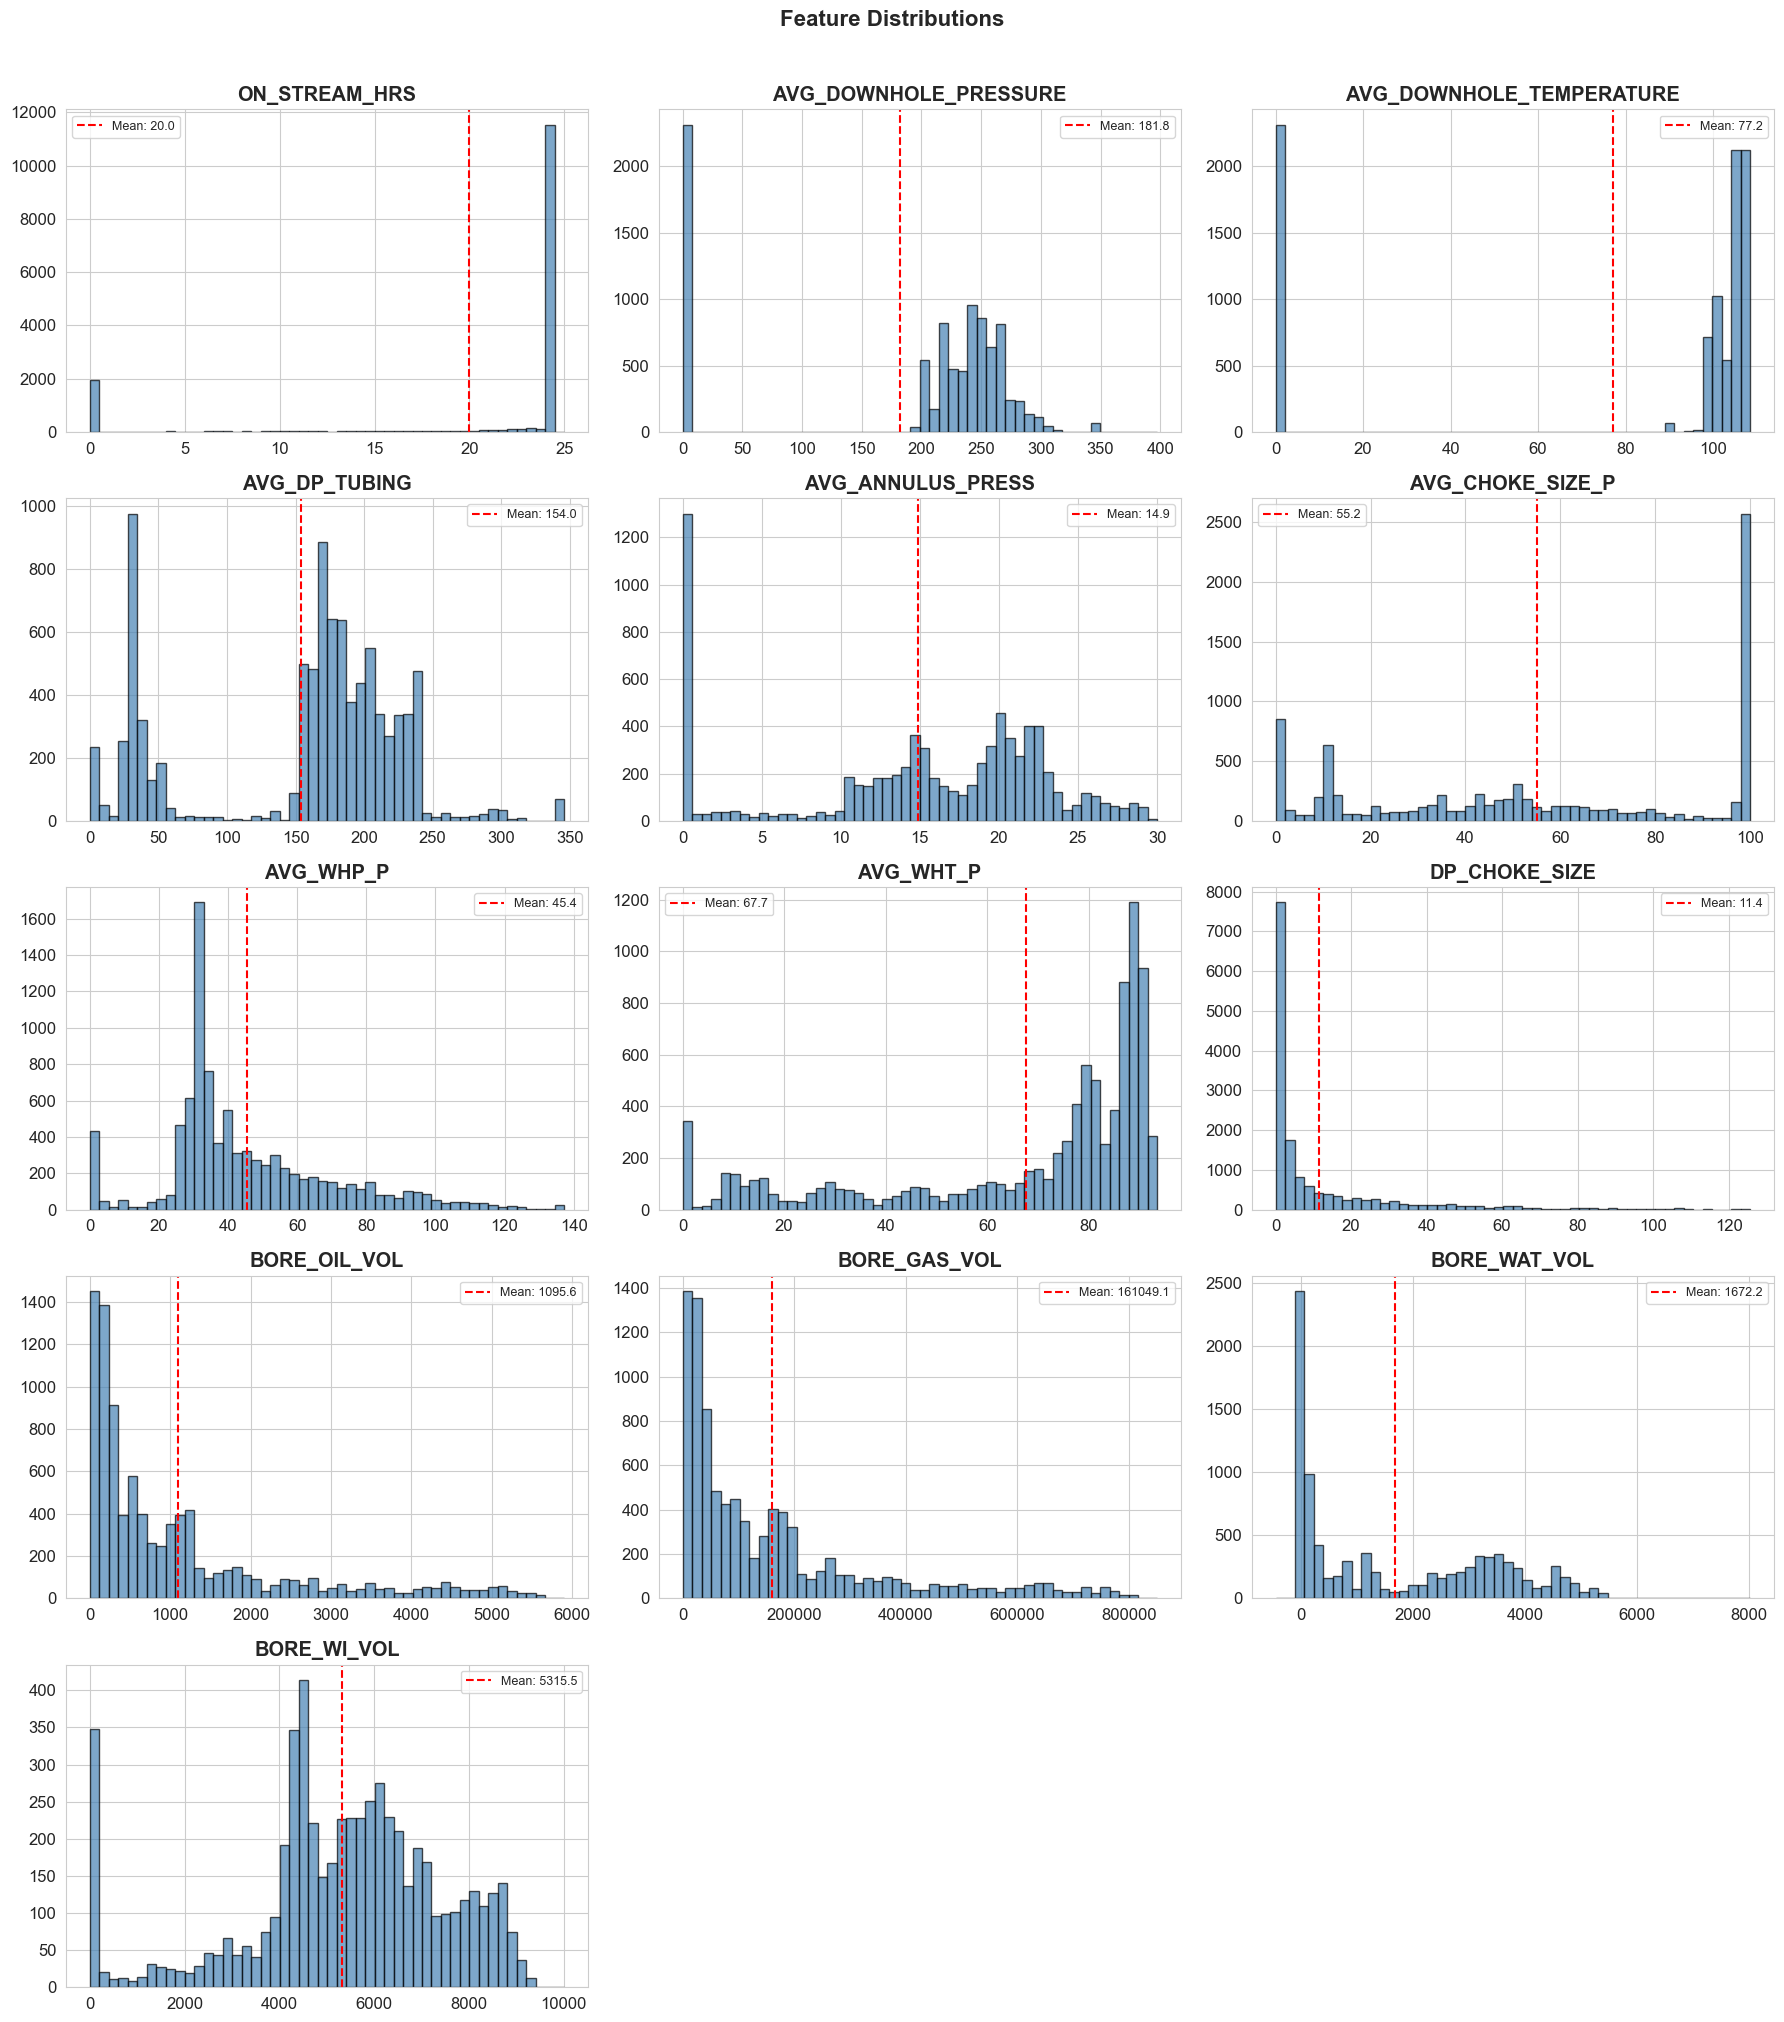

In [16]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != 'NPD_WELL_BORE_CODE']

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    data = df[col].dropna()
    axes[i].hist(data, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].axvline(data.mean(), color='red', linestyle='--', linewidth=1.5, label=f'Mean: {data.mean():.1f}')
    axes[i].set_title(col, fontweight='bold')
    axes[i].legend(fontsize=9)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Feature Distributions', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

---
## 8. Correlation Analysis

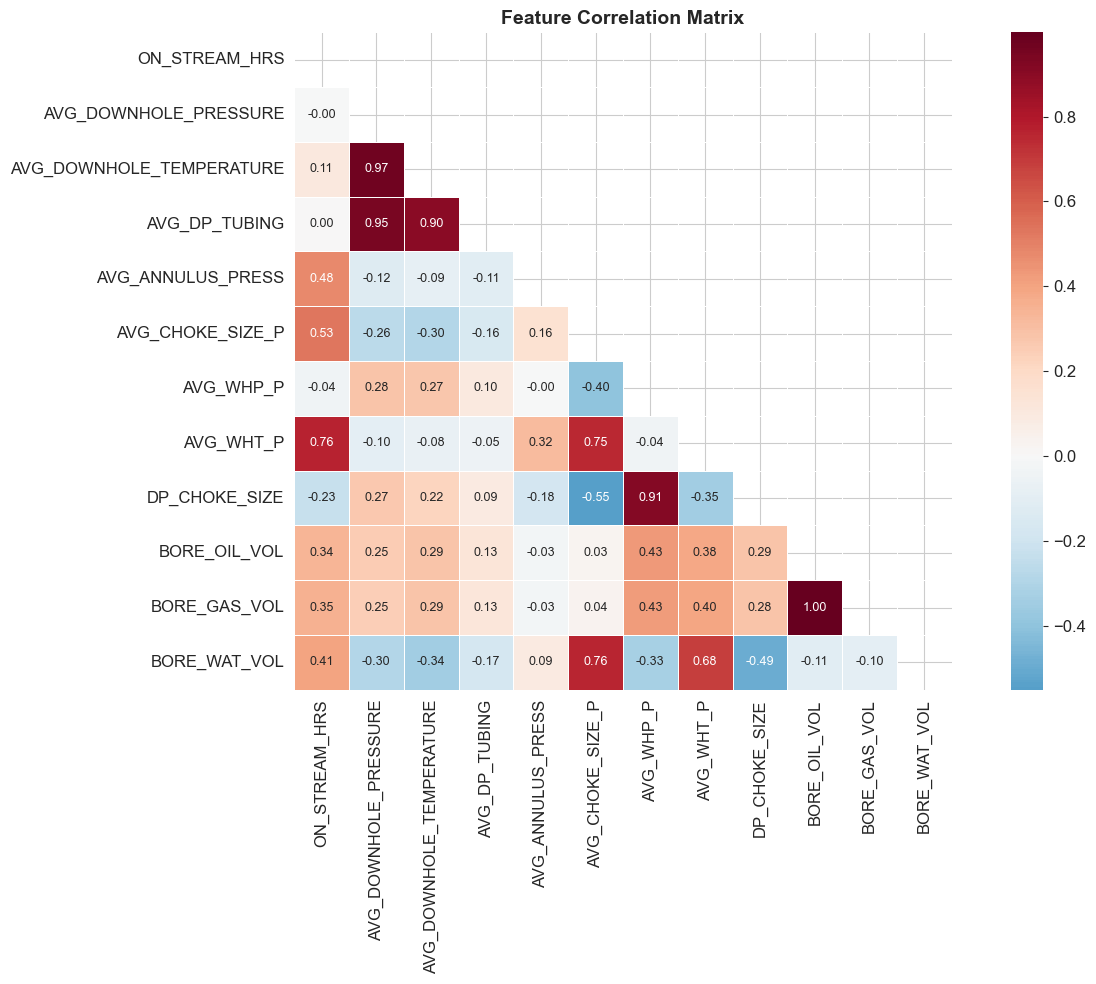

In [17]:
# Correlation matrix
corr_cols = [c for c in numeric_cols if c not in ['BORE_WI_VOL']]  # BORE_WI_VOL has too many NaNs
corr_matrix = df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5, ax=ax,
            annot_kws={'size': 9})
ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

CORRELATION WITH BORE_OIL_VOL (Target)
BORE_GAS_VOL                0.999
AVG_WHP_P                   0.430
AVG_WHT_P                   0.382
ON_STREAM_HRS               0.342
AVG_DOWNHOLE_TEMPERATURE    0.290
DP_CHOKE_SIZE               0.288
AVG_DOWNHOLE_PRESSURE       0.249
AVG_DP_TUBING               0.127
AVG_CHOKE_SIZE_P            0.030
AVG_ANNULUS_PRESS          -0.025
BORE_WAT_VOL               -0.113
Name: BORE_OIL_VOL, dtype: float64


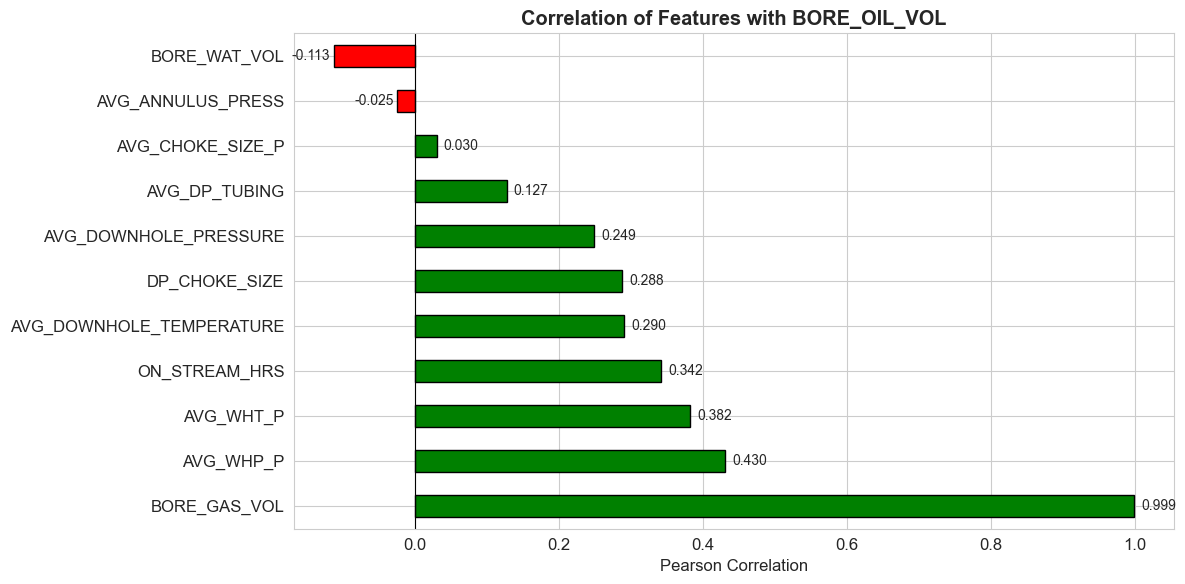

In [18]:
# Correlation with target variable
target_corr = corr_matrix['BORE_OIL_VOL'].drop('BORE_OIL_VOL').sort_values(ascending=False)

print('='*60)
print('CORRELATION WITH BORE_OIL_VOL (Target)')
print('='*60)
print(target_corr.round(3))

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['green' if v > 0 else 'red' for v in target_corr.values]
target_corr.plot(kind='barh', ax=ax, color=colors, edgecolor='black')
ax.set_title('Correlation of Features with BORE_OIL_VOL', fontweight='bold')
ax.set_xlabel('Pearson Correlation')
ax.axvline(x=0, color='black', linewidth=0.8)
for i, v in enumerate(target_corr.values):
    ax.text(v + 0.01 if v > 0 else v - 0.06, i, f'{v:.3f}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

---
## 9. Scatter Plots - Top Correlated Features vs Target

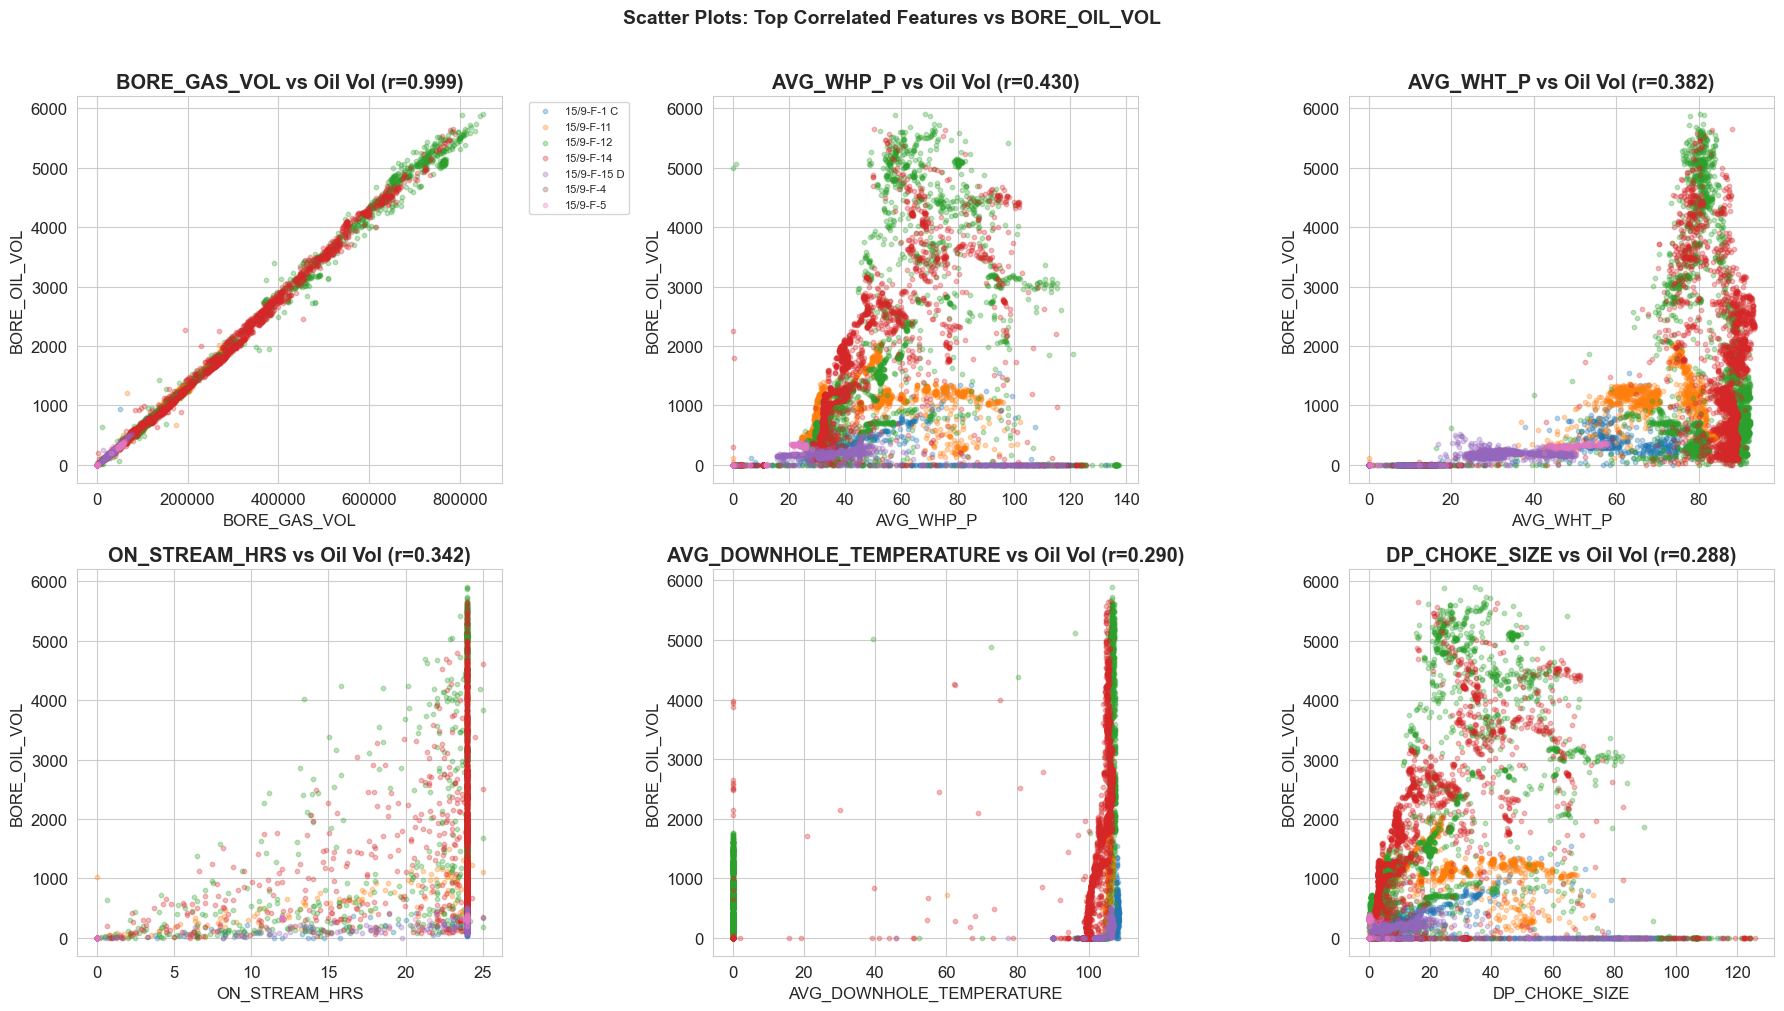

In [19]:
top_features = target_corr.abs().sort_values(ascending=False).head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feat in enumerate(top_features):
    subset = df[[feat, 'BORE_OIL_VOL', 'NPD_WELL_BORE_NAME']].dropna()
    for well in wells:
        w = subset[subset['NPD_WELL_BORE_NAME'] == well]
        axes[i].scatter(w[feat], w['BORE_OIL_VOL'], alpha=0.3, s=10, label=well)
    axes[i].set_xlabel(feat)
    axes[i].set_ylabel('BORE_OIL_VOL')
    corr_val = target_corr[feat]
    axes[i].set_title(f'{feat} vs Oil Vol (r={corr_val:.3f})', fontweight='bold')

axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.suptitle('Scatter Plots: Top Correlated Features vs BORE_OIL_VOL', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

---
## 10. Pairplot of Key Production Features

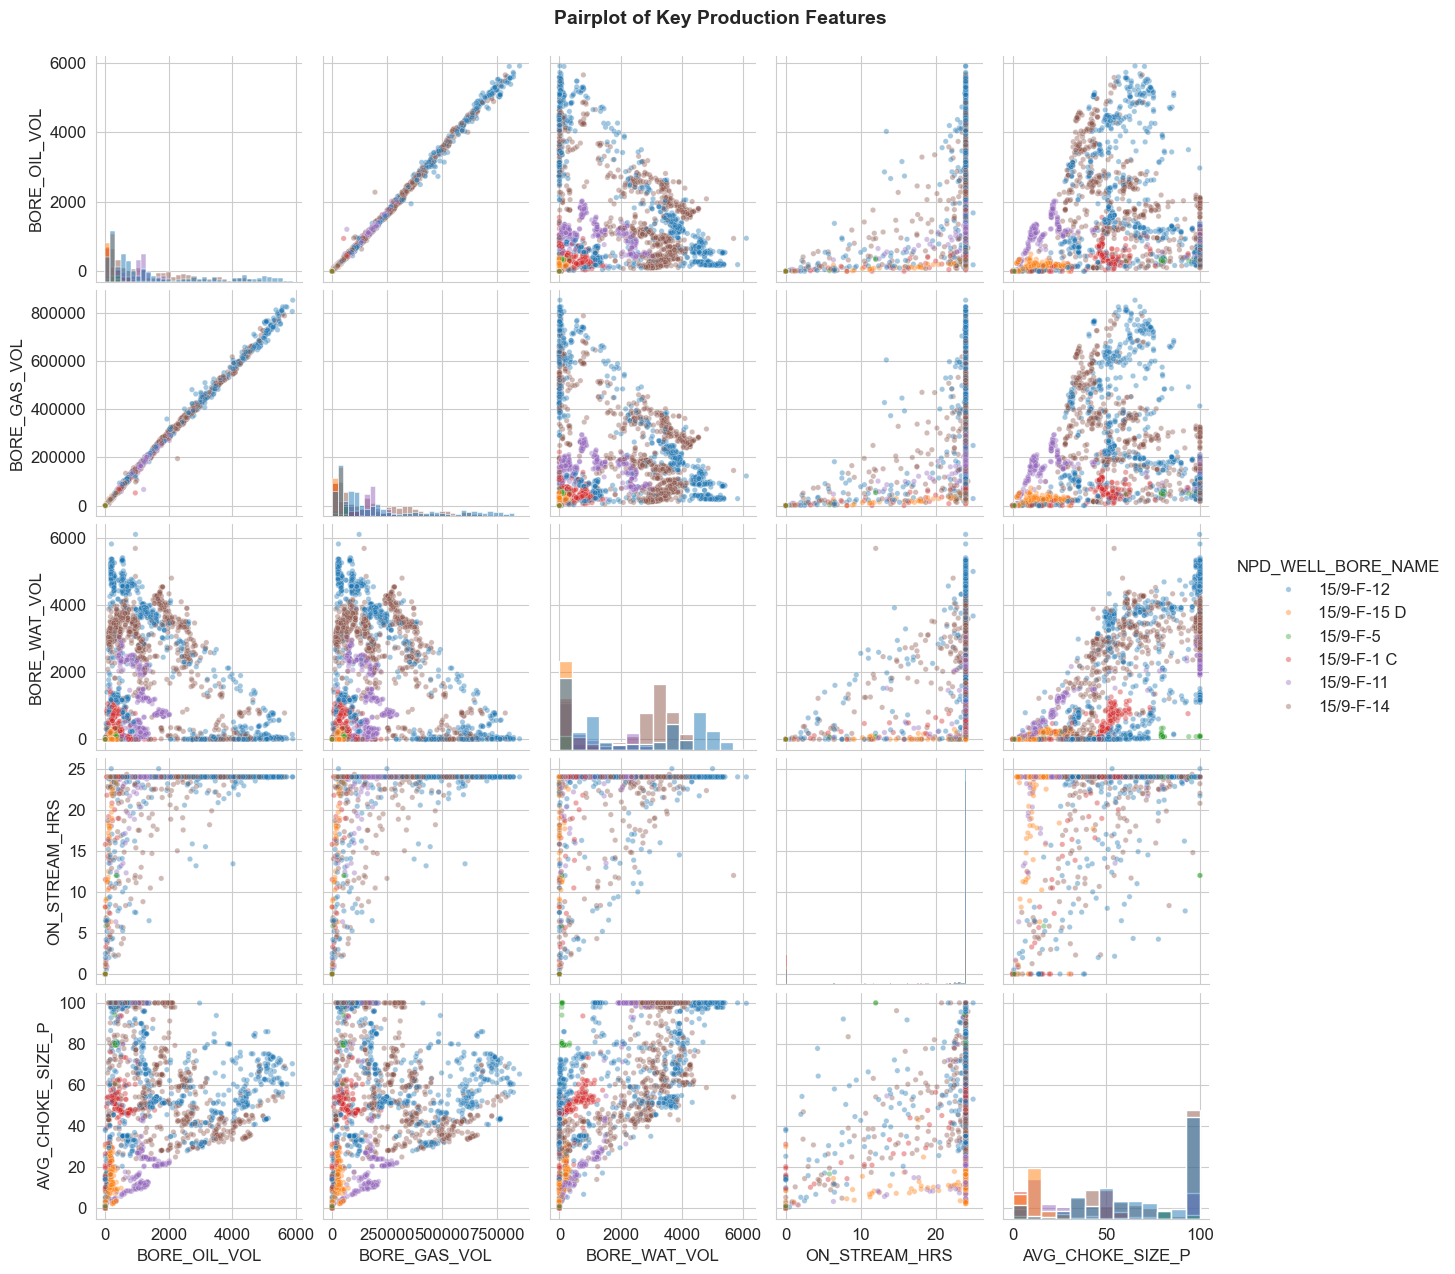

In [20]:
pair_cols = ['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'ON_STREAM_HRS', 'AVG_CHOKE_SIZE_P']
pair_data = df[pair_cols + ['NPD_WELL_BORE_NAME']].dropna()
# Sample to avoid too many points
pair_sample = pair_data.sample(n=min(3000, len(pair_data)), random_state=42)

g = sns.pairplot(pair_sample, hue='NPD_WELL_BORE_NAME', diag_kind='hist',
                 plot_kws={'alpha': 0.4, 's': 15}, height=2.5)
g.figure.suptitle('Pairplot of Key Production Features', y=1.02, fontsize=14, fontweight='bold')
plt.show()

---
## 11. On-Stream Hours Analysis

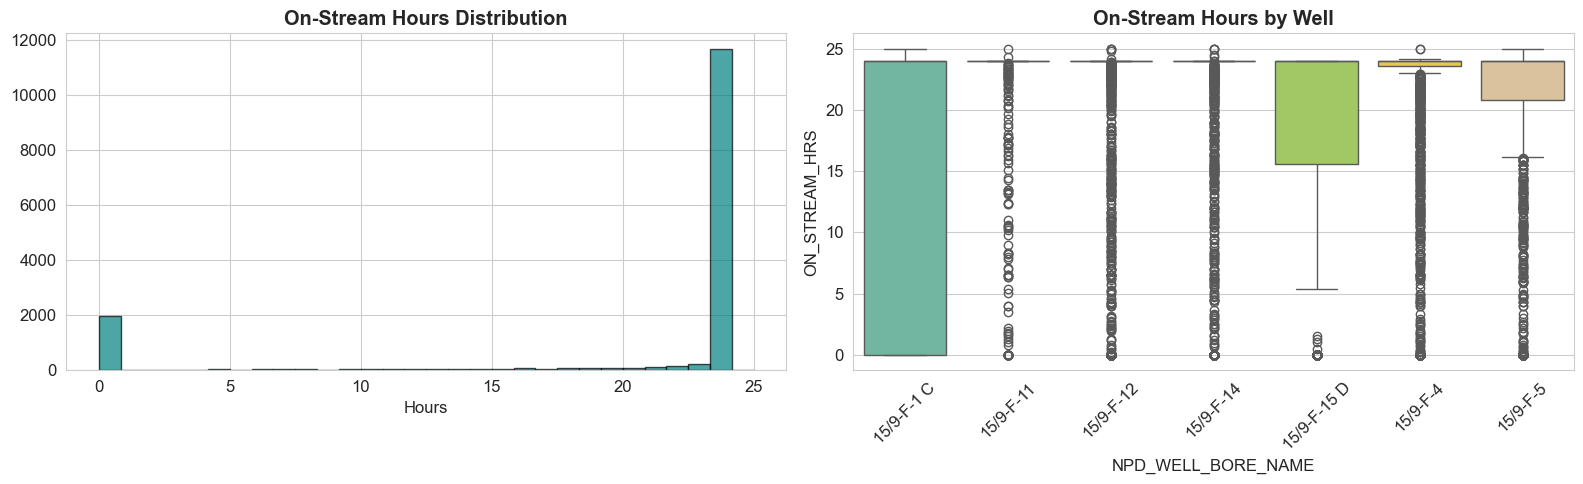

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Distribution
axes[0].hist(df['ON_STREAM_HRS'].dropna(), bins=30, color='teal', edgecolor='black', alpha=0.7)
axes[0].set_title('On-Stream Hours Distribution', fontweight='bold')
axes[0].set_xlabel('Hours')

# Box by well
sns.boxplot(data=df, x='NPD_WELL_BORE_NAME', y='ON_STREAM_HRS', ax=axes[1], palette='Set2')
axes[1].set_title('On-Stream Hours by Well', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---
## 12. Downhole Conditions Analysis

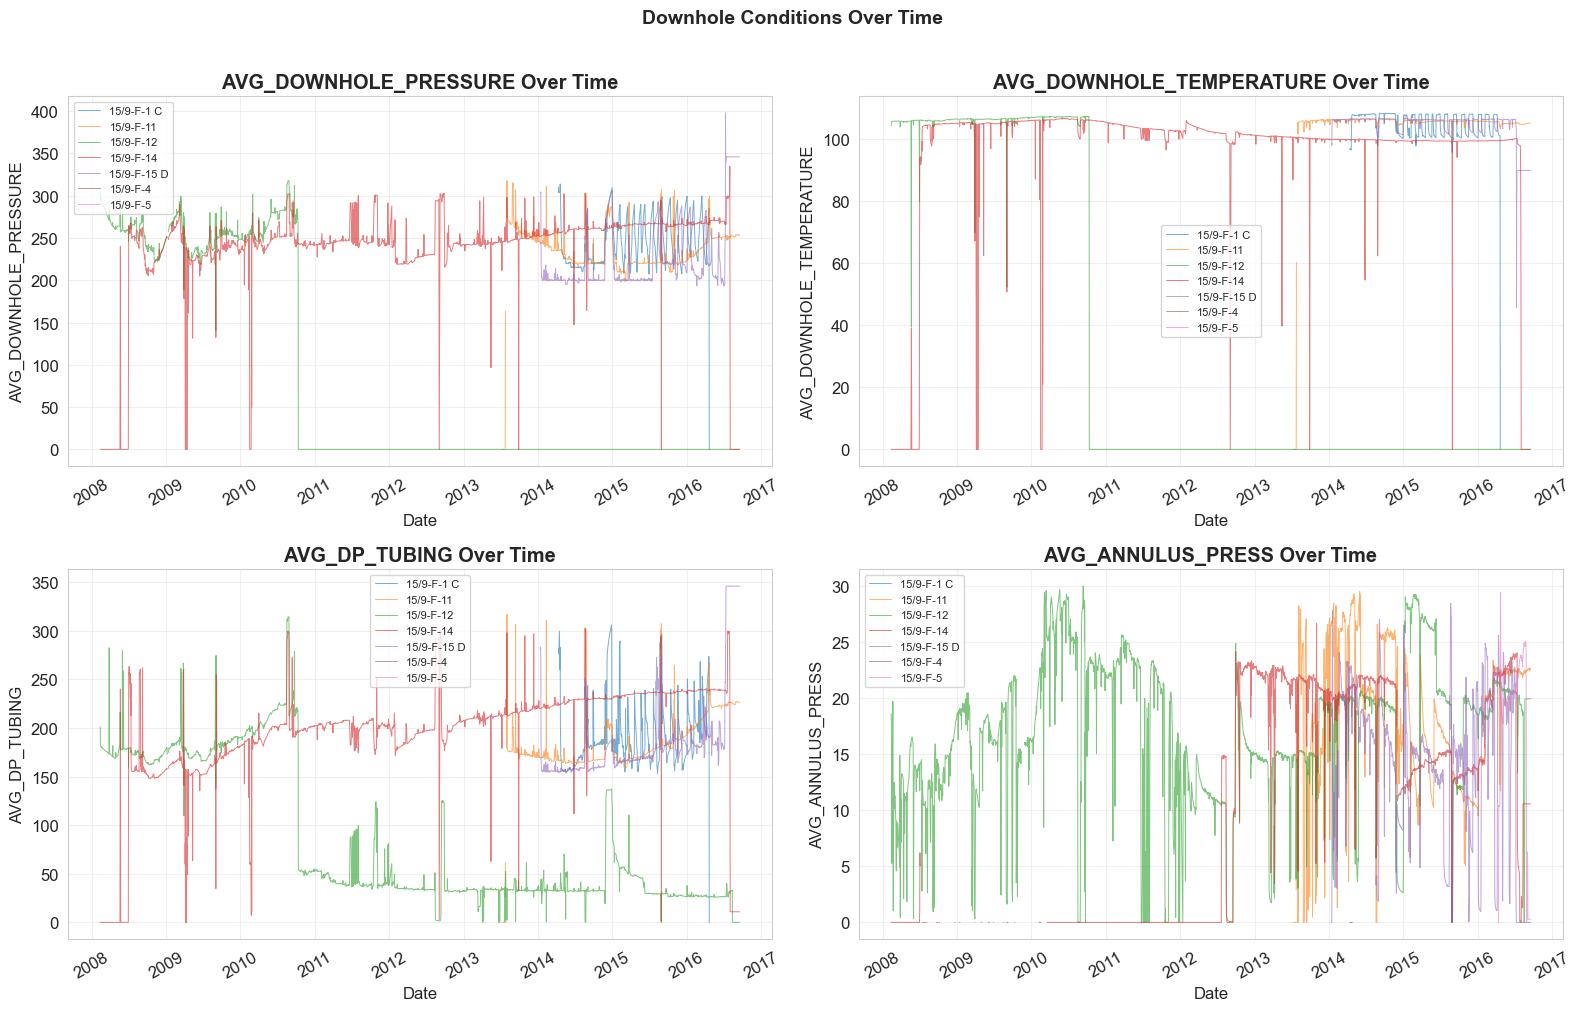

In [22]:
downhole_cols = ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(downhole_cols):
    for well in wells:
        wdf = well_dfs[well]
        axes[i].plot(wdf['DATEPRD'], wdf[col], label=well, alpha=0.6, linewidth=0.7)
    axes[i].set_title(f'{col} Over Time', fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(col)
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=30)

plt.suptitle('Downhole Conditions Over Time', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

---
## 13. Violin Plots - Feature Distributions by Well

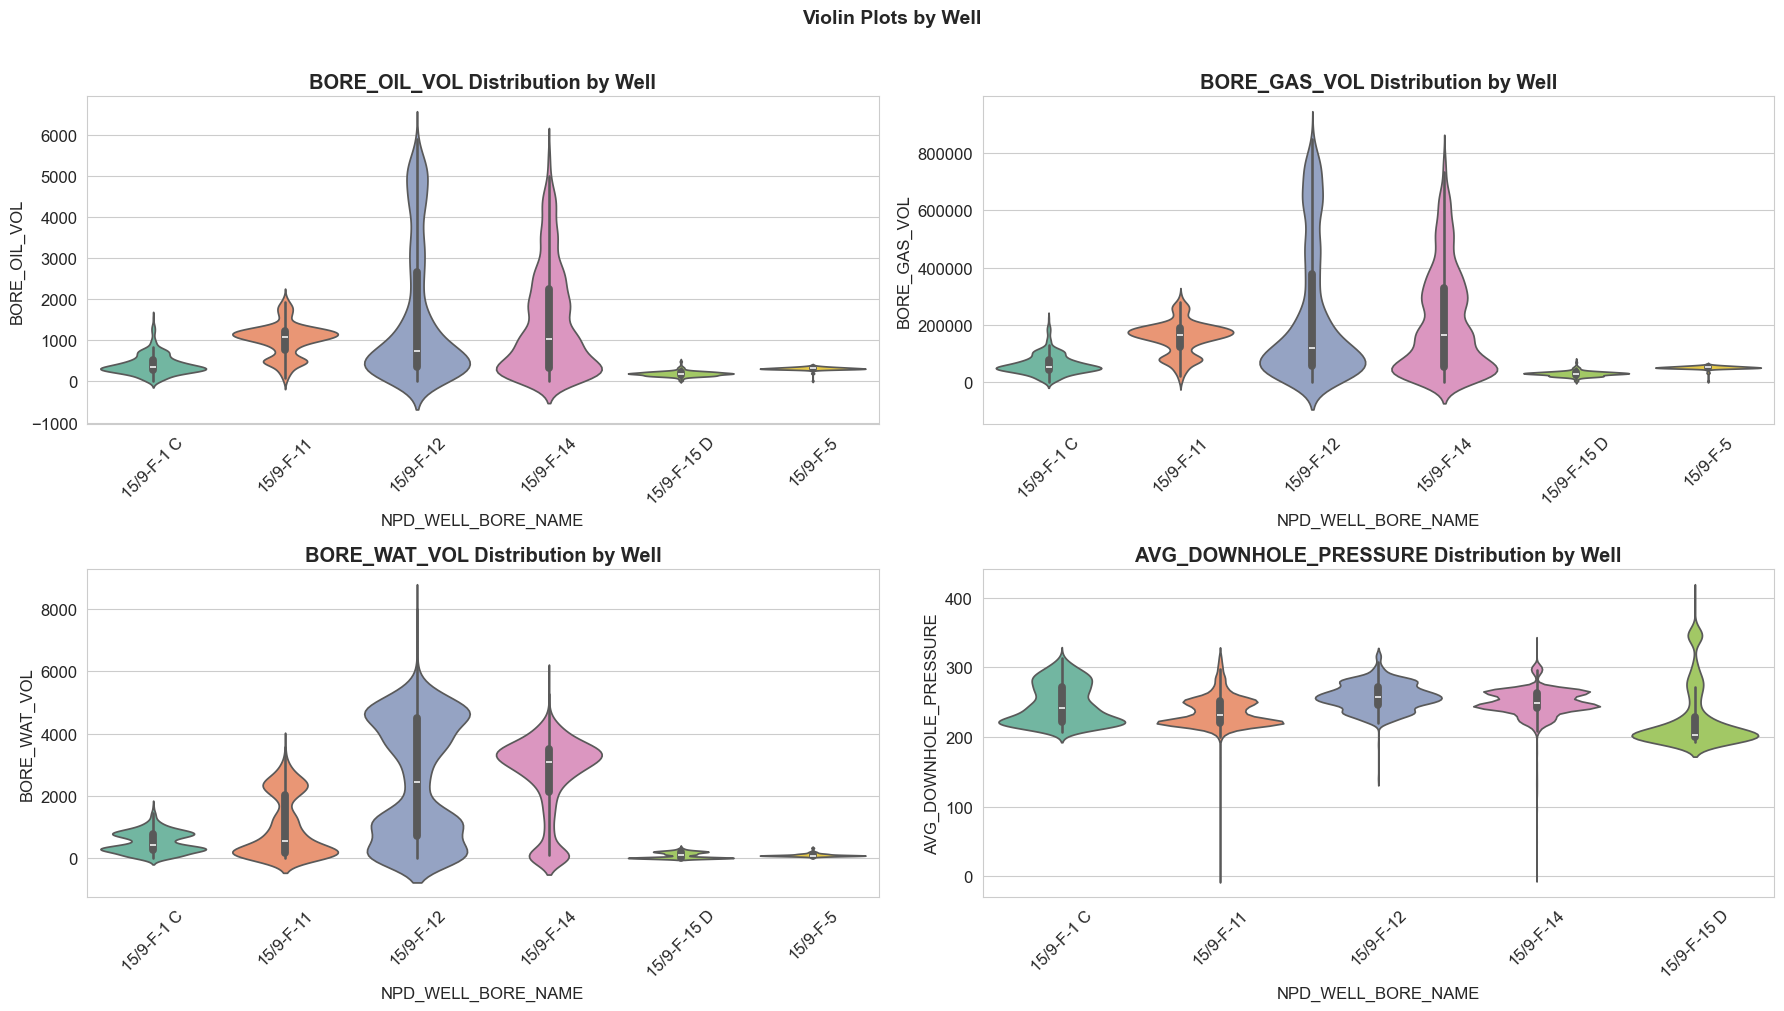

In [23]:
violin_cols = ['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'AVG_DOWNHOLE_PRESSURE']

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(violin_cols):
    data = df[df[col].notna() & (df[col] > 0)]
    if len(data) > 0:
        sns.violinplot(data=data, x='NPD_WELL_BORE_NAME', y=col, ax=axes[i], palette='Set2', inner='box')
    axes[i].set_title(f'{col} Distribution by Well', fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Violin Plots by Well', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

---
## 14. Monthly Aggregated Production Trends

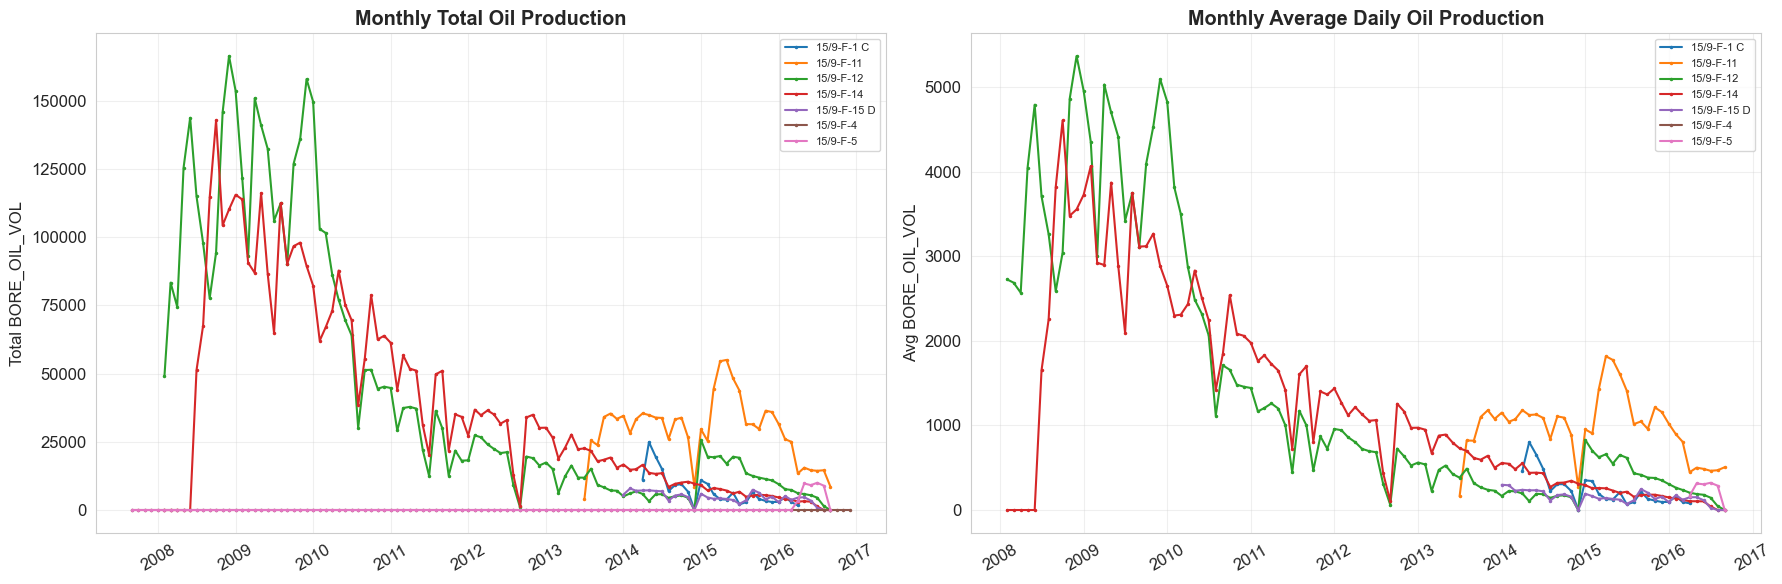

In [24]:
df['YEAR_MONTH'] = df['DATEPRD'].dt.to_period('M')

monthly = df.groupby(['YEAR_MONTH', 'NPD_WELL_BORE_NAME']).agg(
    total_oil=('BORE_OIL_VOL', 'sum'),
    total_gas=('BORE_GAS_VOL', 'sum'),
    total_water=('BORE_WAT_VOL', 'sum'),
    avg_oil=('BORE_OIL_VOL', 'mean'),
    avg_stream_hrs=('ON_STREAM_HRS', 'mean')
).reset_index()
monthly['YEAR_MONTH'] = monthly['YEAR_MONTH'].dt.to_timestamp()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for well in wells:
    wm = monthly[monthly['NPD_WELL_BORE_NAME'] == well]
    axes[0].plot(wm['YEAR_MONTH'], wm['total_oil'], label=well, marker='.', markersize=3)
    axes[1].plot(wm['YEAR_MONTH'], wm['avg_oil'], label=well, marker='.', markersize=3)

axes[0].set_title('Monthly Total Oil Production', fontweight='bold')
axes[0].set_ylabel('Total BORE_OIL_VOL')
axes[0].legend(fontsize=8)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=30)

axes[1].set_title('Monthly Average Daily Oil Production', fontweight='bold')
axes[1].set_ylabel('Avg BORE_OIL_VOL')
axes[1].legend(fontsize=8)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

# Clean up temp column
df.drop('YEAR_MONTH', axis=1, inplace=True)

---
## 15. Choke Size vs Production

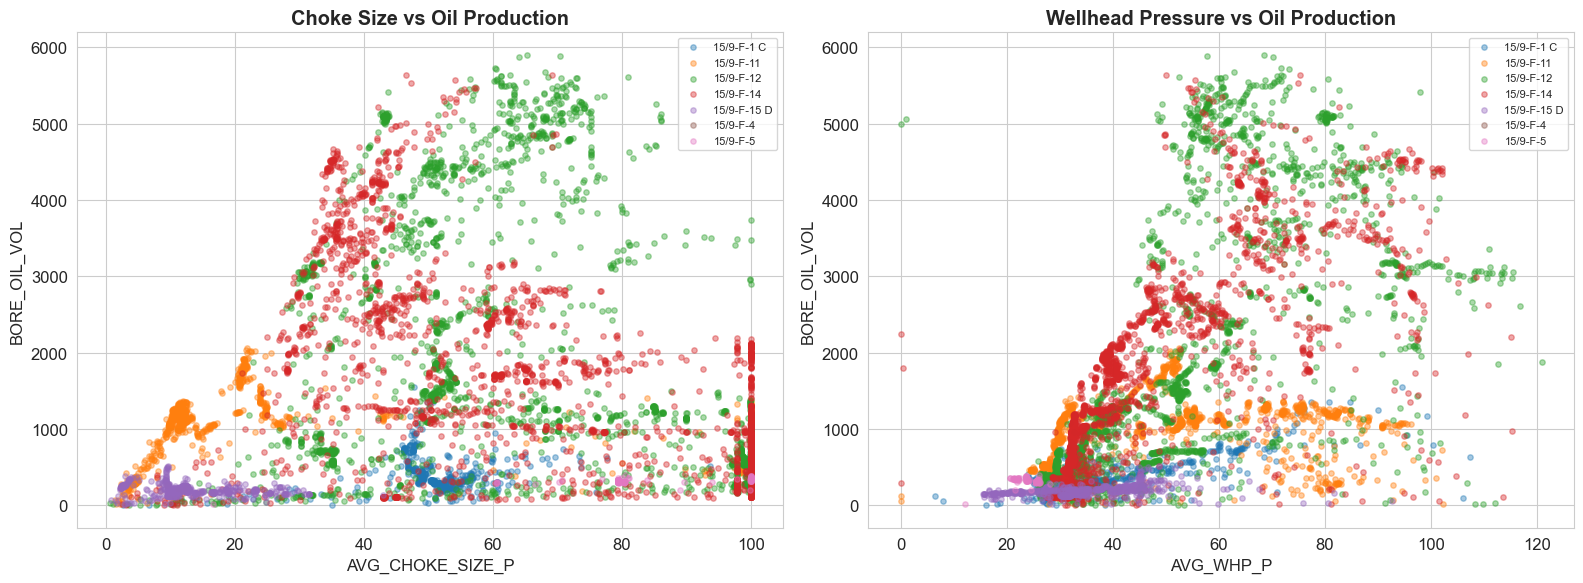

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

subset = df[['AVG_CHOKE_SIZE_P', 'BORE_OIL_VOL', 'NPD_WELL_BORE_NAME']].dropna()
subset = subset[subset['BORE_OIL_VOL'] > 0]

for well in wells:
    w = subset[subset['NPD_WELL_BORE_NAME'] == well]
    axes[0].scatter(w['AVG_CHOKE_SIZE_P'], w['BORE_OIL_VOL'], alpha=0.4, s=15, label=well)

axes[0].set_xlabel('AVG_CHOKE_SIZE_P')
axes[0].set_ylabel('BORE_OIL_VOL')
axes[0].set_title('Choke Size vs Oil Production', fontweight='bold')
axes[0].legend(fontsize=8)

# Wellhead pressure vs production
subset2 = df[['AVG_WHP_P', 'BORE_OIL_VOL', 'NPD_WELL_BORE_NAME']].dropna()
subset2 = subset2[subset2['BORE_OIL_VOL'] > 0]

for well in wells:
    w = subset2[subset2['NPD_WELL_BORE_NAME'] == well]
    axes[1].scatter(w['AVG_WHP_P'], w['BORE_OIL_VOL'], alpha=0.4, s=15, label=well)

axes[1].set_xlabel('AVG_WHP_P')
axes[1].set_ylabel('BORE_OIL_VOL')
axes[1].set_title('Wellhead Pressure vs Oil Production', fontweight='bold')
axes[1].legend(fontsize=8)

plt.tight_layout()
plt.show()

---
## 16. Outlier Detection

In [26]:
# IQR-based outlier detection for key features
outlier_cols = ['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'AVG_DOWNHOLE_PRESSURE',
                'ON_STREAM_HRS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P']

print('='*60)
print('OUTLIER DETECTION (IQR Method)')
print('='*60)

for col in outlier_cols:
    data = df[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data < lower) | (data > upper)]
    print(f'{col}: {len(outliers)} outliers ({len(outliers)/len(data)*100:.1f}%) | Range: [{lower:.1f}, {upper:.1f}]')

OUTLIER DETECTION (IQR Method)
BORE_OIL_VOL: 986 outliers (10.8%) | Range: [-1540.0, 3076.0]
BORE_GAS_VOL: 916 outliers (10.0%) | Range: [-230145.5, 462058.5]
BORE_WAT_VOL: 0 outliers (0.0%) | Range: [-4841.5, 8122.5]
AVG_DOWNHOLE_PRESSURE: 0 outliers (0.0%) | Range: [-383.1, 638.5]
ON_STREAM_HRS: 3821 outliers (24.9%) | Range: [24.0, 24.0]
AVG_CHOKE_SIZE_P: 0 outliers (0.0%) | Range: [-102.5, 221.4]
AVG_WHP_P: 452 outliers (4.9%) | Range: [-7.8, 96.0]
AVG_WHT_P: 552 outliers (6.0%) | Range: [9.4, 135.3]


---
## 17. Water Cut Analysis (Important for ML)

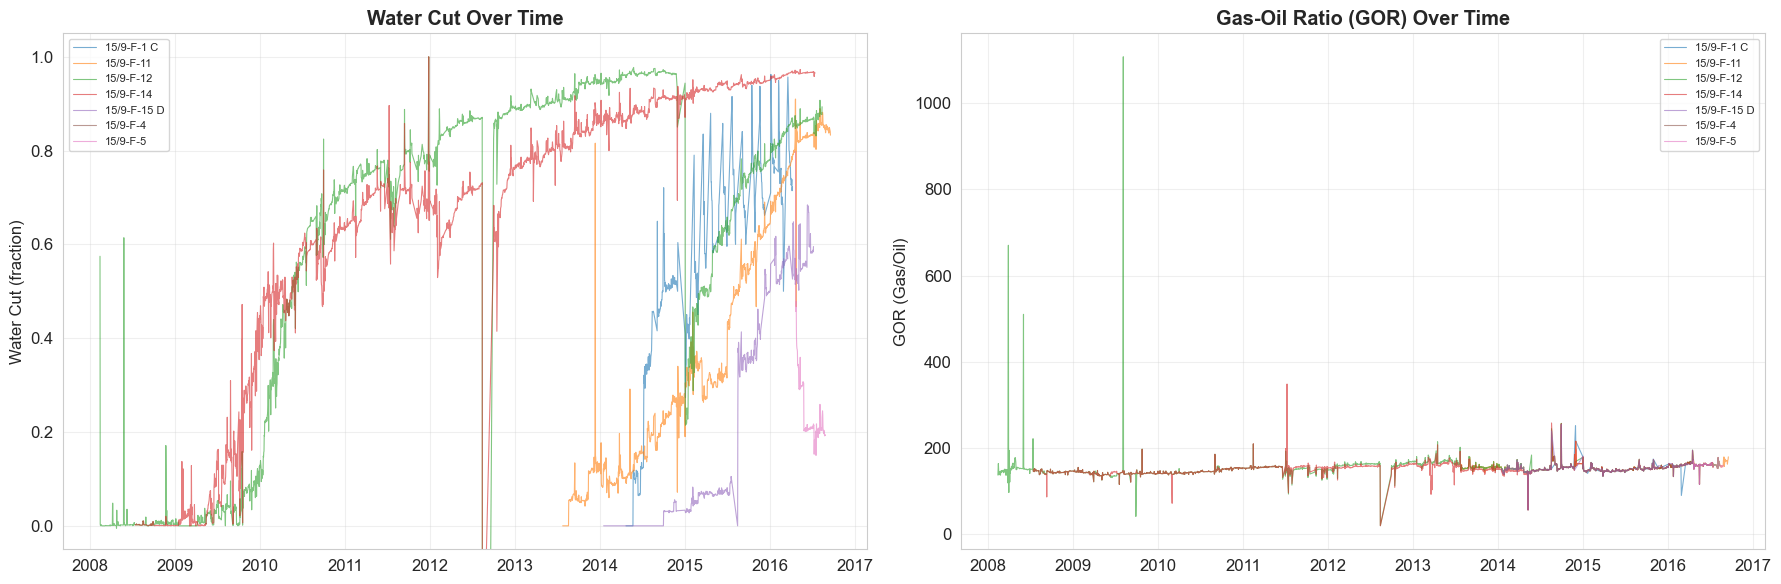

In [27]:
# Water cut = Water / (Oil + Water)
df_prod = df[(df['BORE_OIL_VOL'] > 0) | (df['BORE_WAT_VOL'] > 0)].copy()
df_prod['WATER_CUT'] = df_prod['BORE_WAT_VOL'] / (df_prod['BORE_OIL_VOL'] + df_prod['BORE_WAT_VOL'])
df_prod['GOR'] = df_prod['BORE_GAS_VOL'] / df_prod['BORE_OIL_VOL'].replace(0, np.nan)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for well in wells:
    wdf = df_prod[df_prod['NPD_WELL_BORE_NAME'] == well]
    axes[0].plot(wdf['DATEPRD'], wdf['WATER_CUT'], label=well, alpha=0.6, linewidth=0.8)
    axes[1].plot(wdf['DATEPRD'], wdf['GOR'], label=well, alpha=0.6, linewidth=0.8)

axes[0].set_title('Water Cut Over Time', fontweight='bold')
axes[0].set_ylabel('Water Cut (fraction)')
axes[0].set_ylim(-0.05, 1.05)
axes[0].legend(fontsize=8)
axes[0].grid(True, alpha=0.3)

axes[1].set_title('Gas-Oil Ratio (GOR) Over Time', fontweight='bold')
axes[1].set_ylabel('GOR (Gas/Oil)')
axes[1].legend(fontsize=8)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## 18. Summary & Recommendations for ML Modeling

### Key Findings:
1. **7 Wells** with varying record counts (746 to 3327 records each)
2. **Heavy missing data** in downhole measurements (~42-50% missing) and BORE_WI_VOL (~63% missing)
3. **Target (BORE_OIL_VOL)** is right-skewed with many zero values
4. **Strong correlations** with BORE_GAS_VOL, ON_STREAM_HRS, and choke/pressure features

### ML Preprocessing Recommendations:
- Drop `BORE_WI_VOL` (63% missing, mostly for injection wells)
- Drop `AVG_CHOKE_UOM` (constant value '%')
- Handle missing downhole data: imputation or drop rows
- Consider well-specific models or use well as a categorical feature
- Filter to `FLOW_KIND == 'production'` and `WELL_TYPE == 'OP'` for oil production prediction
- Engineer features: Water Cut, GOR, lagged production values
- Address zero-inflation in target variable

In [28]:
print('='*60)
print('QUICK REFERENCE FOR ML MODELING')
print('='*60)
print(f'\nTarget: BORE_OIL_VOL')
print(f'Total samples: {len(df)}')
print(f'Samples with target available: {df["BORE_OIL_VOL"].notna().sum()}')
print(f'Production rows (OP wells): {len(df[df["WELL_TYPE"] == "OP"])}')
print(f'\nSuggested features to keep:')
keep_features = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
                 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P',
                 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']
for f in keep_features:
    corr_val = df[f].corr(df['BORE_OIL_VOL'])
    null_pct = df[f].isnull().sum() / len(df) * 100
    print(f'  {f}: corr={corr_val:.3f}, missing={null_pct:.1f}%')

print(f'\nFeatures to drop: NPD_WELL_BORE_CODE, AVG_CHOKE_UOM, BORE_WI_VOL')
print(f'Categorical to encode: NPD_WELL_BORE_NAME, FLOW_KIND, WELL_TYPE')

QUICK REFERENCE FOR ML MODELING

Target: BORE_OIL_VOL
Total samples: 15634
Samples with target available: 9161
Production rows (OP wells): 9143

Suggested features to keep:
  ON_STREAM_HRS: corr=0.342, missing=1.8%
  AVG_DOWNHOLE_PRESSURE: corr=0.249, missing=42.6%
  AVG_DOWNHOLE_TEMPERATURE: corr=0.290, missing=42.6%
  AVG_DP_TUBING: corr=0.127, missing=42.6%
  AVG_ANNULUS_PRESS: corr=-0.025, missing=49.5%
  AVG_CHOKE_SIZE_P: corr=0.030, missing=43.0%
  AVG_WHP_P: corr=0.430, missing=41.4%
  AVG_WHT_P: corr=0.382, missing=41.5%
  DP_CHOKE_SIZE: corr=0.288, missing=1.9%

Features to drop: NPD_WELL_BORE_CODE, AVG_CHOKE_UOM, BORE_WI_VOL
Categorical to encode: NPD_WELL_BORE_NAME, FLOW_KIND, WELL_TYPE
